In [1]:
#Importing the necessary packages

import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams
import seaborn as sns

# 1. Read the data as an appropriate Time Series data and plot the data.

In [2]:
#rose = pd.read_csv('Rose (1).csv')
rose = pd.read_csv('Rose (1).csv', parse_dates = True, index_col = 'YearMonth')
rose.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [3]:
#Sparkle
sparkle = pd.read_csv('Sparkling (1).csv', parse_dates = True, index_col = 'YearMonth')
sparkle.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [4]:
#rose.describe()

rose.describe().T

count       mean        std   min   25%   50%    75%    max
Rose  185.0  90.394595  39.175344  28.0  63.0  86.0  112.0  267.0

In [5]:
sparkle.describe().T

count         mean         std     min     25%     50%     75%  \
Sparkling  187.0  2402.417112  1295.11154  1070.0  1605.0  1874.0  2549.0   

              max  
Sparkling  7242.0

In [6]:
rose.isnull().sum()

Rose    2
dtype: int64

In [7]:
sparkle.isnull().sum()

Sparkling    0
dtype: int64

In [8]:
rose.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [9]:
sparkle.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


The rose dataset contains missing values

In [10]:
rose['1994'] #As the dataset contain null values.

<ipython-input-10-2ea6fd53de74>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  rose['1994'] #As the dataset contain null values.


Rose
YearMonth       
1994-01-01  30.0
1994-02-01  35.0
1994-03-01  42.0
1994-04-01  48.0
1994-05-01  44.0
1994-06-01  45.0
1994-07-01   NaN
1994-08-01   NaN
1994-09-01  46.0
1994-10-01  51.0
1994-11-01  63.0
1994-12-01  84.0

In [11]:
rose= rose.interpolate();
print(rose)

             Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0
...           ...
1995-03-01   45.0
1995-04-01   52.0
1995-05-01   28.0
1995-06-01   40.0
1995-07-01   62.0

[187 rows x 1 columns]


In [12]:
rose.isnull().sum()

Rose    0
dtype: int64

As data had missing values, it has been removed using the interpolate().

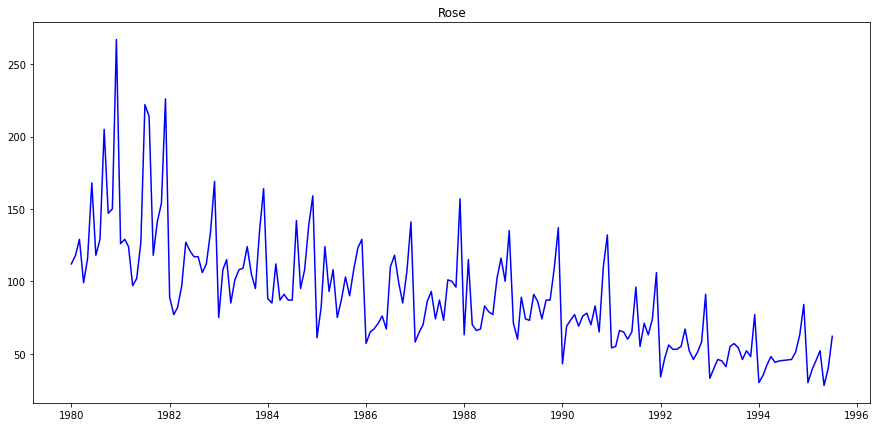

In [13]:
plt.rcParams['figure.figsize']=(15,7)
plt.plot(rose, color='blue')
plt.title('Rose') 
plt.show()

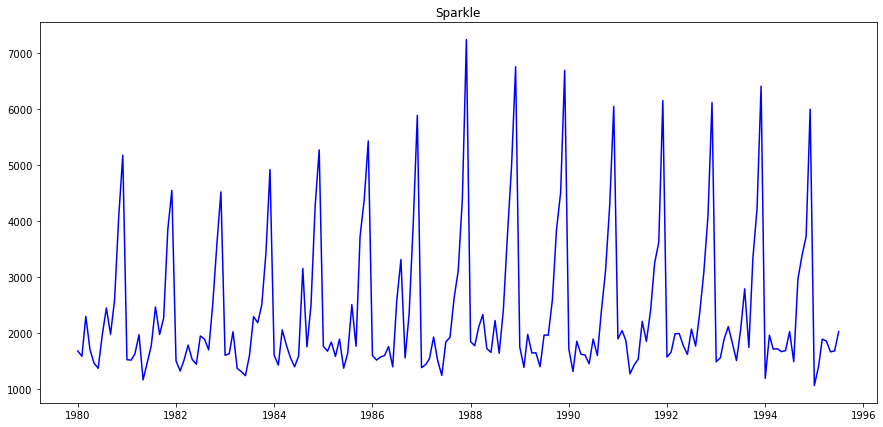

In [14]:
plt.rcParams['figure.figsize']=(15,7)
plt.plot(sparkle, color='blue')
plt.title('Sparkle') 
plt.show()

# 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

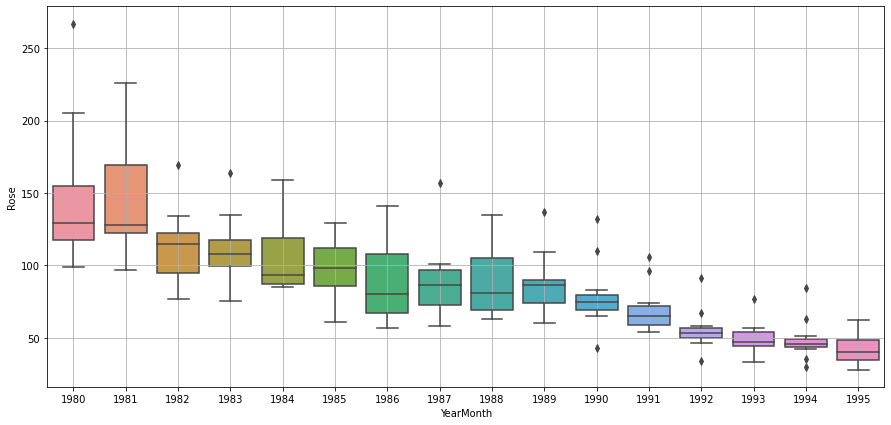

In [15]:
sns.boxplot(x = rose.index.year,y = rose['Rose'])
plt.grid();

Highest - 1981 lowest - 1994 and 1995

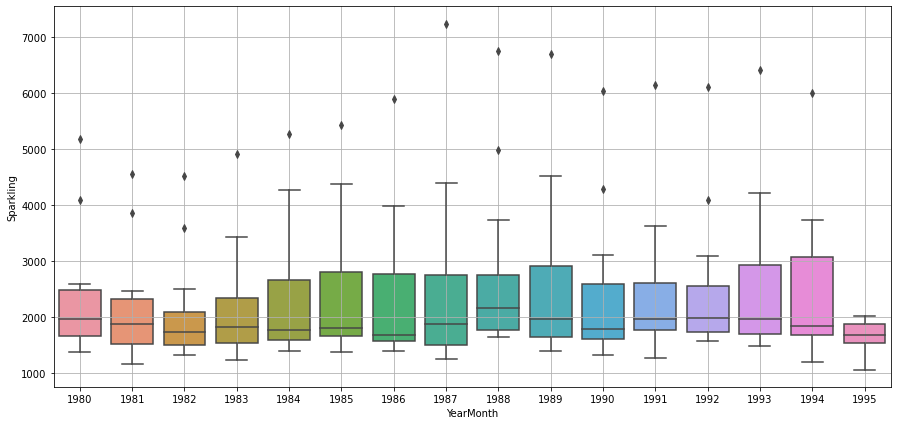

In [16]:
sns.boxplot(x = sparkle.index.year,y = sparkle['Sparkling'])
plt.grid();

highest- 1994 and lowest-1995

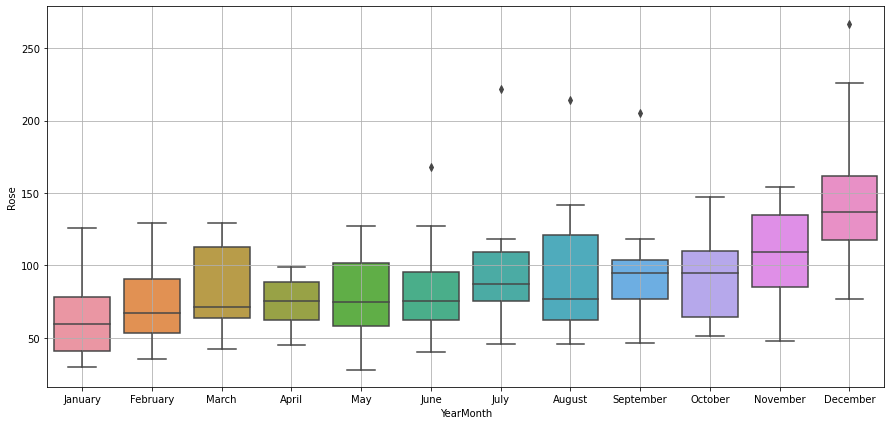

In [17]:
sns.boxplot(x = rose.index.month_name(),y = rose['Rose'])
plt.grid();

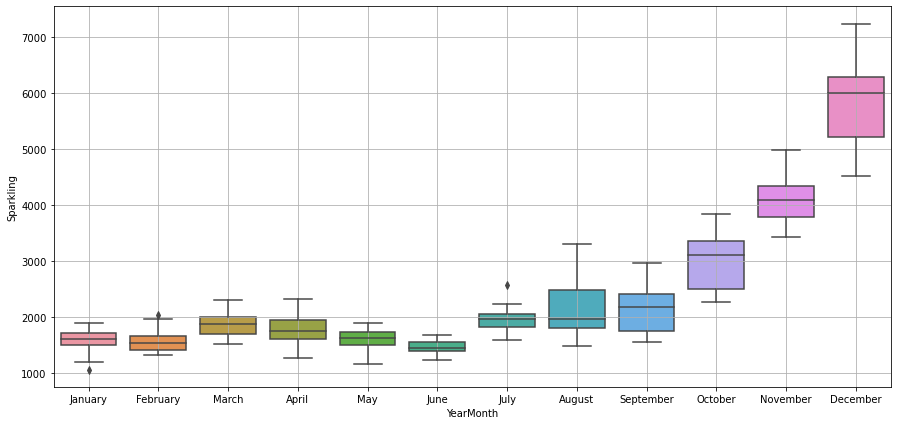

In [18]:
sns.boxplot(x = sparkle.index.month_name(),y = sparkle['Sparkling'])
plt.grid();

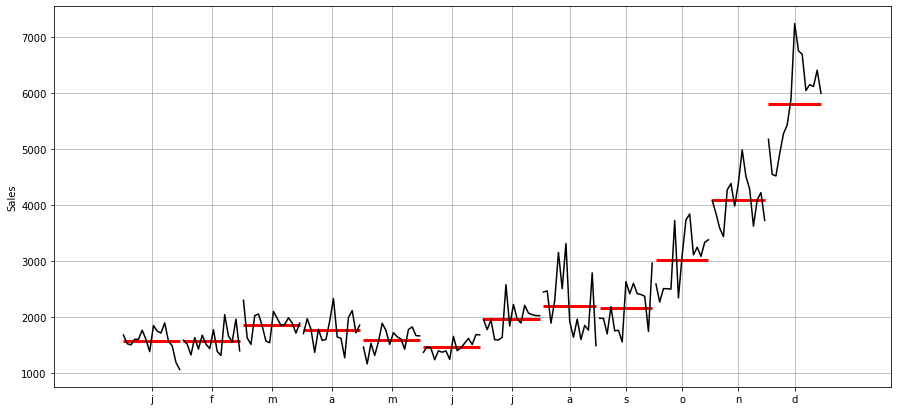

In [19]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(sparkle['Sparkling'],ylabel='Sales')
plt.grid();

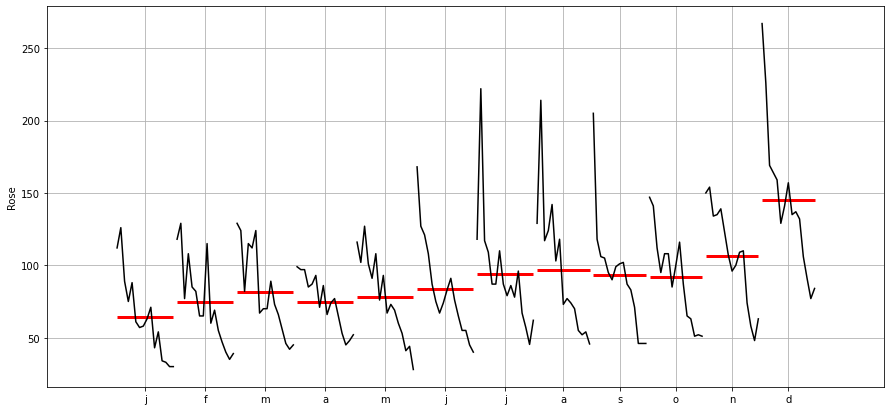

In [322]:
month_plot(rose['Rose'],ylabel='Rose')
plt.grid();

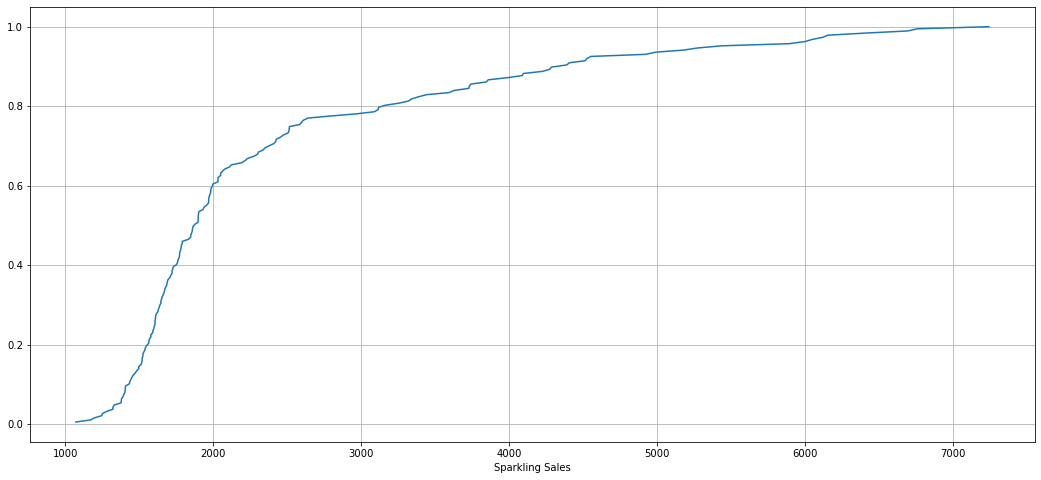

In [21]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(sparkle['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sparkling Sales');

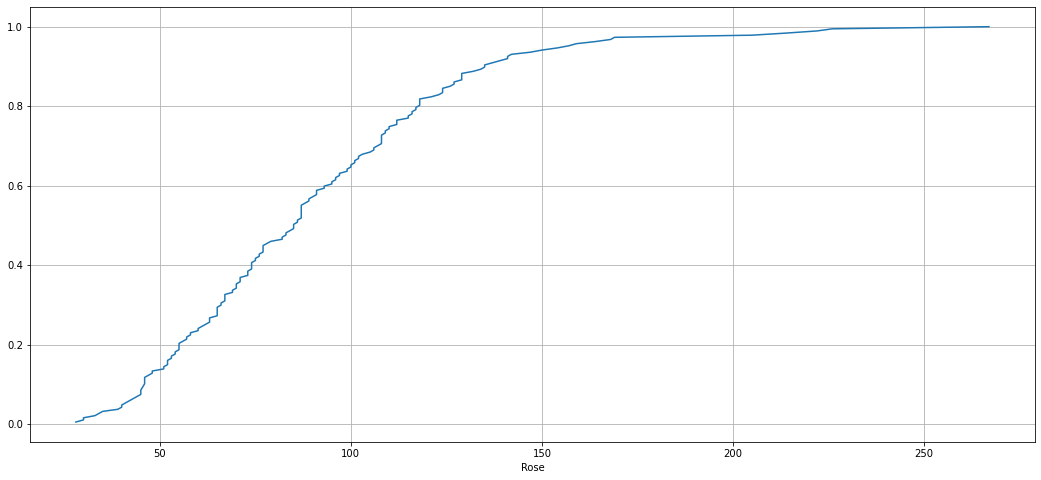

In [22]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(rose['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Rose');

#### Plot a graph for 'Rose' and 'Sparkle' in parts per million across years.

In [23]:
monthly_across_years_rose = pd.pivot_table(rose, values = 'Rose', columns = rose.index.month_name(), index = rose.index.year)
monthly_across_years_rose

YearMonth  April      August  December  February  January        July   June  \
YearMonth                                                                      
1980        99.0  129.000000     267.0     118.0    112.0  118.000000  168.0   
1981        97.0  214.000000     226.0     129.0    126.0  222.000000  127.0   
1982        97.0  117.000000     169.0      77.0     89.0  117.000000  121.0   
1983        85.0  124.000000     164.0     108.0     75.0  109.000000  108.0   
1984        87.0  142.000000     159.0      85.0     88.0   87.000000   87.0   
1985        93.0  103.000000     129.0      82.0     61.0   87.000000   75.0   
1986        71.0  118.000000     141.0      65.0     57.0  110.000000   67.0   
1987        86.0   73.000000     157.0      65.0     58.0   87.000000   74.0   
1988        66.0   77.000000     135.0     115.0     63.0   79.000000   83.0   
1989        74.0   74.000000     137.0      60.0     71.0   86.000000   91.0   
1990        77.0   70.000000     132.0      69.0     43.0   78.000000   76.0   
1991        65.0   55.000000     106.0      55.0     54.0   96.000000   65.0   
1992        53.0   52.000000      91.0      47.0     34.0   67.000000   55.0   
1993        45.0   54.000000      77.0      40.0     33.0   57.000000   55.0   
1994        48.0   45.666667      84.0      35.0     30.0   45.333333   45.0   
1995        52.0         NaN       NaN      39.0     30.0   62.000000   40.0   

YearMonth  March    May  November  October  September  
YearMonth                                              
1980       129.0  116.0     150.0    147.0      205.0  
1981       124.0  102.0     154.0    141.0      118.0  
1982        82.0  127.0     134.0    112.0      106.0  
1983       115.0  101.0     135.0     95.0      105.0  
1984       112.0   91.0     139.0    108.0       95.0  
1985       124.0  108.0     123.0    108.0       90.0  
1986        67.0   76.0     107.0     85.0       99.0  
1987        70.0   93.0      96.0    100.0      101.0  
1988        70.0   67.0     100.0    116.0      102.0  
1989        89.0   73.0     109.0     87.0       87.0  
1990        73.0   69.0     110.0     65.0       83.0  
1991        66.0   60.0      74.0     63.0       71.0  
1992        56.0   53.0      58.0     51.0       46.0  
1993        46.0   41.0      48.0     52.0       46.0  
1994        42.0   44.0      63.0     51.0       46.0  
1995        45.0   28.0       NaN      NaN        NaN

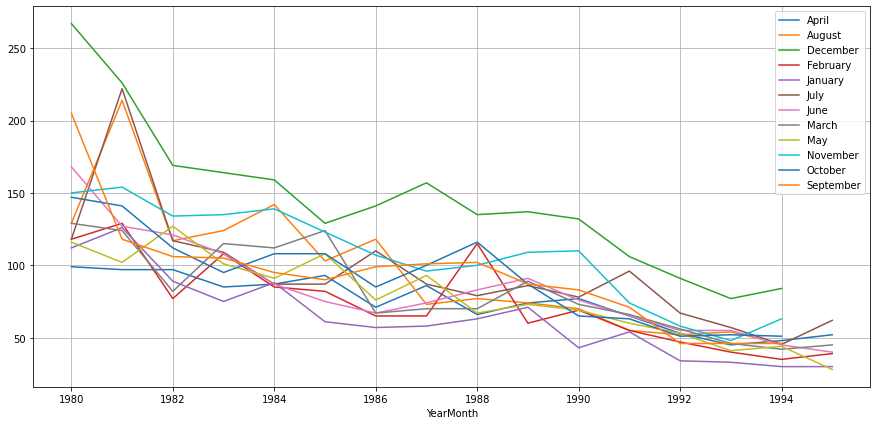

In [24]:
monthly_across_years_rose.plot()
plt.grid()
plt.legend(loc='best');

In [25]:
monthly_across_years_sparkle = pd.pivot_table(sparkle, values = 'Sparkling', columns = sparkle.index.month_name(), index = sparkle.index.year)
monthly_across_years_sparkle

YearMonth   April  August  December  February  January    July    June  \
YearMonth                                                                
1980       1712.0  2453.0    5179.0    1591.0   1686.0  1966.0  1377.0   
1981       1976.0  2472.0    4551.0    1523.0   1530.0  1781.0  1480.0   
1982       1790.0  1897.0    4524.0    1329.0   1510.0  1954.0  1449.0   
1983       1375.0  2298.0    4923.0    1638.0   1609.0  1600.0  1245.0   
1984       1789.0  3159.0    5274.0    1435.0   1609.0  1597.0  1404.0   
1985       1589.0  2512.0    5434.0    1682.0   1771.0  1645.0  1379.0   
1986       1605.0  3318.0    5891.0    1523.0   1606.0  2584.0  1403.0   
1987       1935.0  1930.0    7242.0    1442.0   1389.0  1847.0  1250.0   
1988       2336.0  1645.0    6757.0    1779.0   1853.0  2230.0  1661.0   
1989       1650.0  1968.0    6694.0    1394.0   1757.0  1971.0  1406.0   
1990       1628.0  1605.0    6047.0    1321.0   1720.0  1899.0  1457.0   
1991       1279.0  1857.0    6153.0    2049.0   1902.0  2214.0  1540.0   
1992       1997.0  1773.0    6119.0    1667.0   1577.0  2076.0  1625.0   
1993       2121.0  2795.0    6410.0    1564.0   1494.0  2048.0  1515.0   
1994       1725.0  1495.0    5999.0    1968.0   1197.0  2031.0  1693.0   
1995       1862.0     NaN       NaN    1402.0   1070.0  2031.0  1688.0   

YearMonth   March     May  November  October  September  
YearMonth                                                
1980       2304.0  1471.0    4087.0   2596.0     1984.0  
1981       1633.0  1170.0    3857.0   2273.0     1981.0  
1982       1518.0  1537.0    3593.0   2514.0     1706.0  
1983       2030.0  1320.0    3440.0   2511.0     2191.0  
1984       2061.0  1567.0    4273.0   2504.0     1759.0  
1985       1846.0  1896.0    4388.0   3727.0     1771.0  
1986       1577.0  1765.0    3987.0   2349.0     1562.0  
1987       1548.0  1518.0    4405.0   3114.0     2638.0  
1988       2108.0  1728.0    4988.0   3740.0     2421.0  
1989       1982.0  1654.0    4514.0   3845.0     2608.0  
1990       1859.0  1615.0    4286.0   3116.0     2424.0  
1991       1874.0  1432.0    3627.0   3252.0     2408.0  
1992       1993.0  1783.0    4096.0   3088.0     2377.0  
1993       1898.0  1831.0    4227.0   3339.0     1749.0  
1994       1720.0  1674.0    3729.0   3385.0     2968.0  
1995       1897.0  1670.0       NaN      NaN        NaN

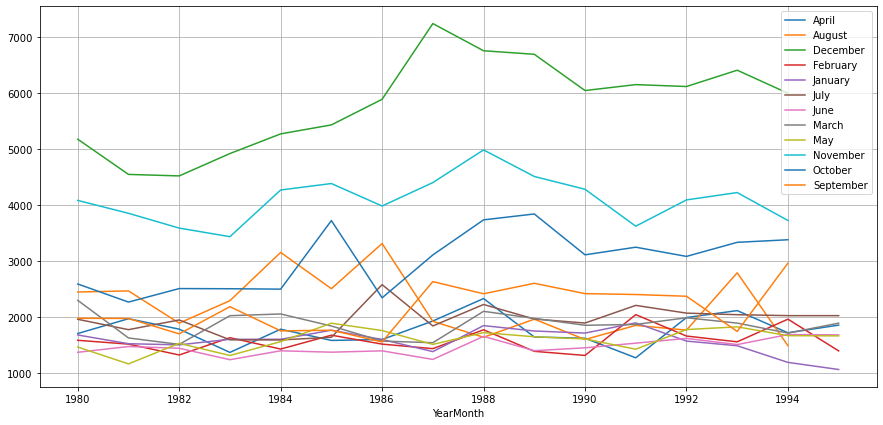

In [26]:
monthly_across_years_sparkle.plot()
plt.grid()
plt.legend(loc='best');

In [27]:
df_yearly_sum_rose = rose.resample('A').sum()
df_yearly_sum_rose.head()

Rose
YearMonth         
1980-12-31  1758.0
1981-12-31  1780.0
1982-12-31  1348.0
1983-12-31  1324.0
1984-12-31  1280.0

In [28]:
df_yearly_sum_sparkle = sparkle.resample('A').sum()
df_yearly_sum_sparkle.head()

Sparkling
YearMonth            
1980-12-31      28406
1981-12-31      26227
1982-12-31      25321
1983-12-31      26180
1984-12-31      28431

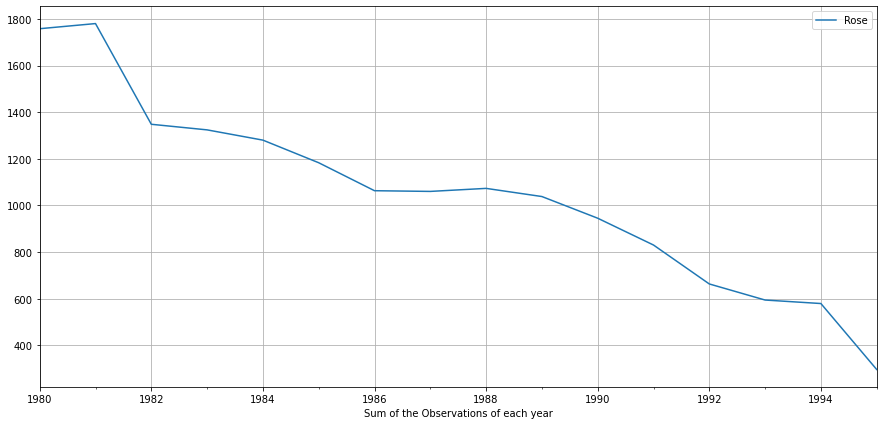

In [29]:
df_yearly_sum_rose.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

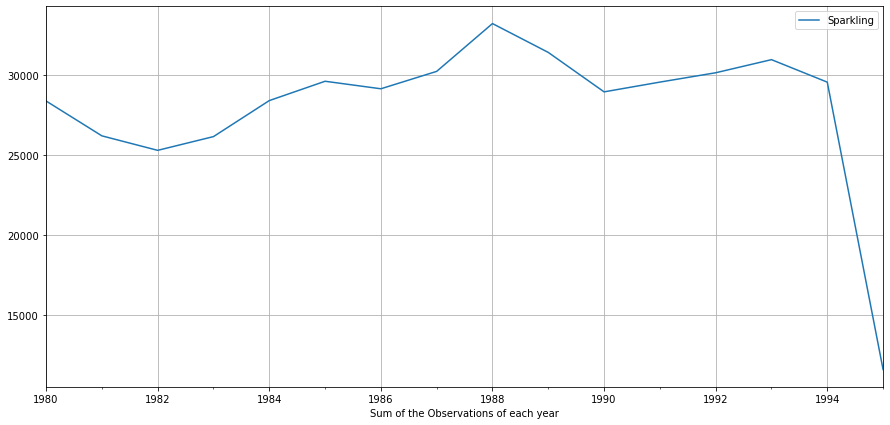

In [30]:
df_yearly_sum_sparkle.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

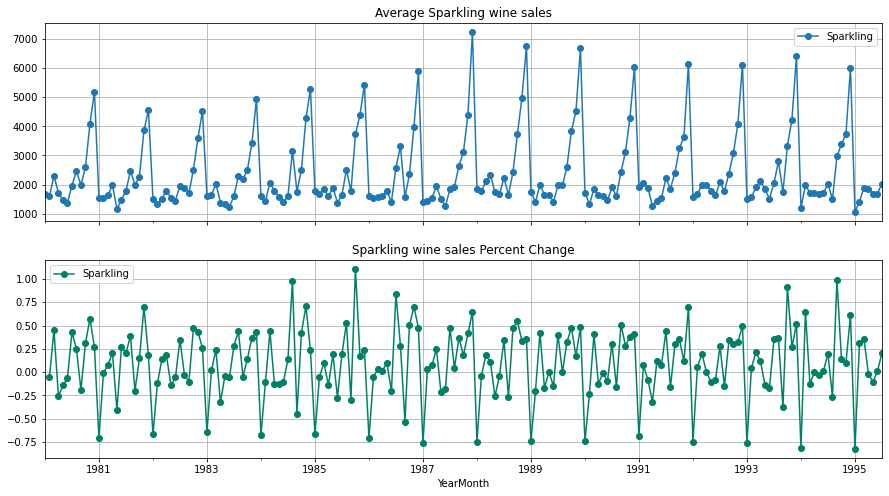

In [31]:
# group by date and get average Sparkling wine Sales, and precent change
average    = sparkle.groupby(sparkle.index)["Sparkling"].mean()
pct_change = sparkle.groupby(sparkle.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Sparkling wine Sales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sparkling wine sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for Sparkling wine Sales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sparkling wine sales Percent Change",grid=True)

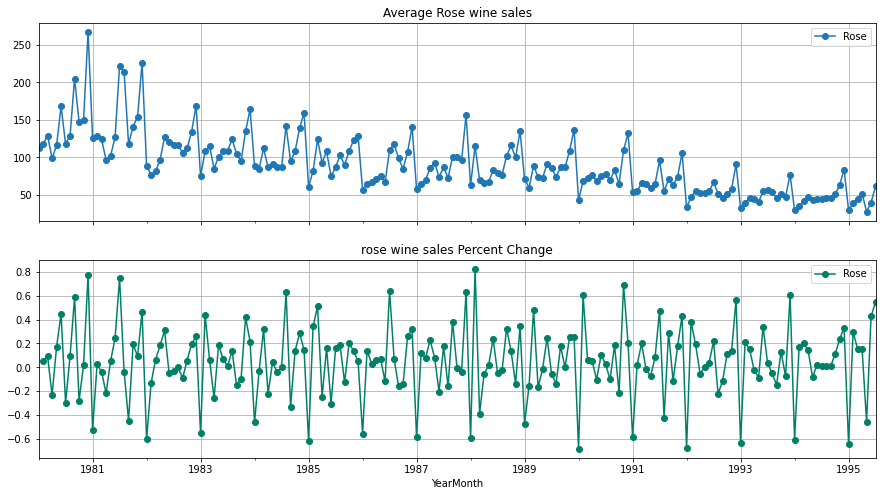

In [32]:
# group by date and get average Sparkling wine Sales, and precent change
average    = rose.groupby(rose.index)["Rose"].mean()
pct_change = rose.groupby(rose.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Sparkling wine Sales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Rose wine sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for Sparkling wine Sales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="rose wine sales Percent Change",grid=True)

## Decompose the Time Series and plot the different components

In [33]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

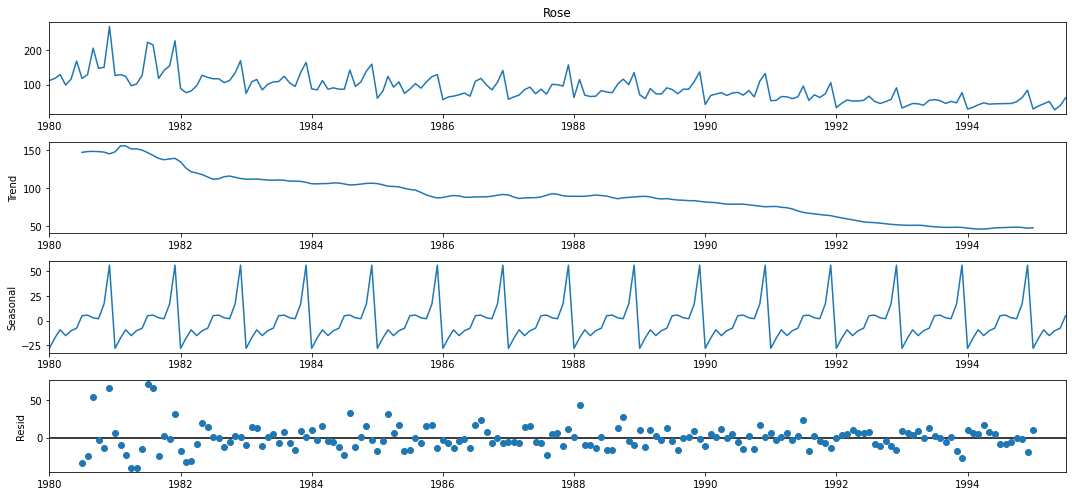

In [34]:
decomposition_add = seasonal_decompose(rose['Rose'],model='additive')
decomposition_add.plot();

In [35]:
trend = decomposition_add.trend
seasonality = decomposition_add.seasonal
residual = decomposition_add.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -27.908647
1980-02-01   -17.435632
1980-03-01    -9.285830
1980-04-01   -15.098330
1980-05-01   -10.196544
1980-06-01    -7.678687
1980-07-01     4.896908
1980-08-01     5.499686
1980-09-01     2.774686
1980-10-01     1.871908
1980-11-01    16.846908
1980-12-01    55.713575
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
1980-06-01          NaN
1980-07-01   -33.980241
1980-08-01   -24.624686
1980-09-01    53.850314
1980-10-01    -2.955241
1980-11-01   -14.263575
1980-12-01    66.16142

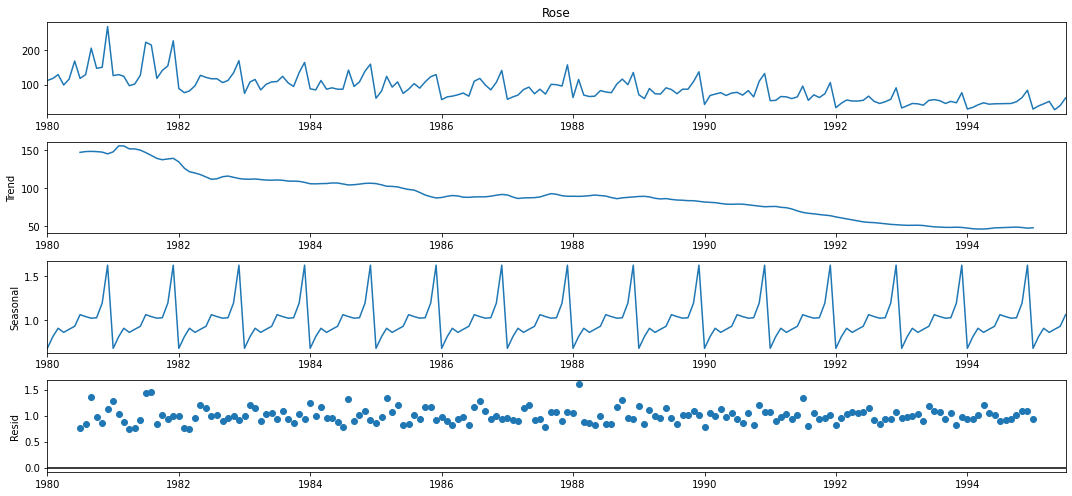

In [36]:
decomposition_mul = seasonal_decompose(rose['Rose'],model='multiplicative')
decomposition_mul.plot();

In [37]:
trend = decomposition_mul.trend
seasonality = decomposition_mul.seasonal
residual = decomposition_mul.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.670111
1980-02-01    0.806163
1980-03-01    0.901164
1980-04-01    0.854024
1980-05-01    0.889415
1980-06-01    0.923985
1980-07-01    1.058038
1980-08-01    1.035881
1980-09-01    1.017648
1980-10-01    1.022573
1980-11-01    1.192349
1980-12-01    1.628646
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.758258
1980-08-01    0.840720
1980-09-01    1.357674
1980-10-01    0.970771
1980-11-01    0.853378
1980-12-01    1.129646
Name: resid, dtype: fl

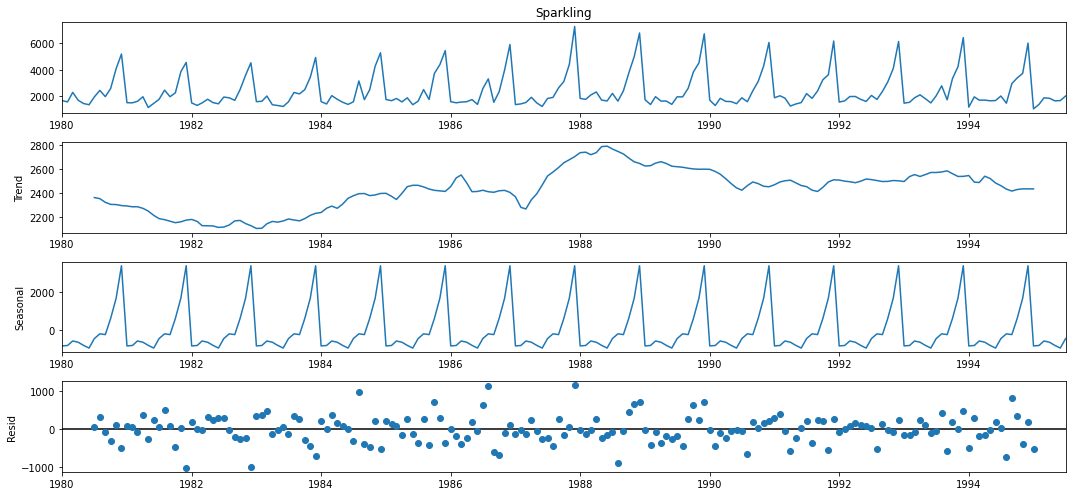

In [38]:
decomposition_add_sparkle = seasonal_decompose(sparkle['Sparkling'],model='additive')
decomposition_add_sparkle.plot();

In [40]:
trend = decomposition_add_sparkle.trend
seasonality = decomposition_add_sparkle.seasonal
residual = decomposition_add_sparkle.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -854.260599
1980-02-01    -830.350678
1980-03-01    -592.356630
1980-04-01    -658.490559
1980-05-01    -824.416154
1980-06-01    -967.434011
1980-07-01    -465.502265
1980-08-01    -214.332821
1980-09-01    -254.677265
1980-10-01     599.769957
1980-11-01    1675.067179
1980-12-01    3386.983846
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01     70.835599
1980-08-01    315.999487
1980-09-01    -81.864401
1980-10-01   -307.353290


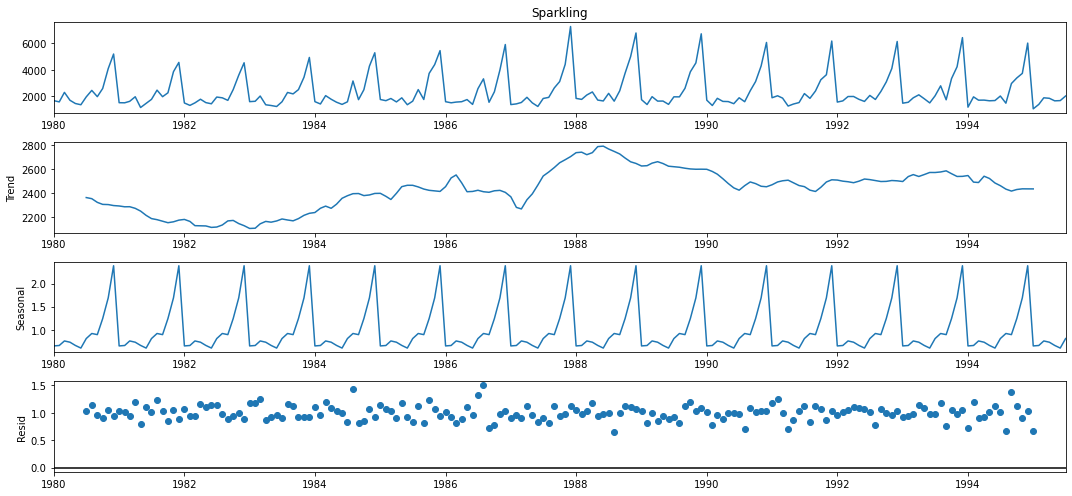

In [42]:
decomposition_mul_sparkle = seasonal_decompose(sparkle['Sparkling'],model='multiplicative')
decomposition_mul_sparkle.plot();

In [43]:
trend = decomposition_mul_sparkle.trend
seasonality = decomposition_mul_sparkle.seasonal
residual = decomposition_mul_sparkle.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
1980-06-01    0.603468
1980-07-01    0.809164
1980-08-01    0.918822
1980-09-01    0.894367
1980-10-01    1.241789
1980-11-01    1.690158
1980-12-01    2.384776
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    1.029230
1980-08-01    1.135407
1980-09-01    0.955954
1980-10-01    0.907513
1980-11-01    1.050423
1980-12-01    0.946770
Name: resi

# 3. Split the data into training and test. The test data should start in 1991.

In [44]:
train_sparkle= sparkle[sparkle.index.year < 1991]
test_sparkle= sparkle[sparkle.index.year >= 1991]

In [46]:
print(train_sparkle.shape)
print(test_sparkle.shape)

(132, 1)
(55, 1)


In [48]:
from IPython.display import display

In [49]:
print('First few rows of Training Data')
display(train_sparkle.head())
print('Last few rows of Training Data')
display(train_sparkle.tail())
print('First few rows of Test Data')
display(test_sparkle.head())
print('Last few rows of Test Data')
display(test_sparkle.tail())

First few rows of Training Data


Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

Last few rows of Training Data


Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

First few rows of Test Data


Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432

Last few rows of Test Data


Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

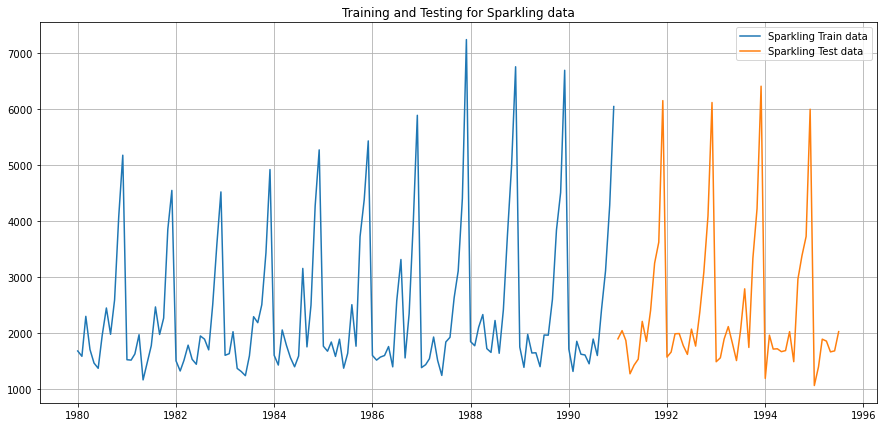

In [50]:
## Plotting the Training data, Test data for Sparkling data

plt.plot(train_sparkle, label='Sparkling Train data')
plt.plot(test_sparkle, label='Sparkling Test data')
plt.legend(loc='best')
plt.grid()
plt.title('Training and Testing for Sparkling data');

In [51]:
#rose

In [52]:
train_rose =rose[rose.index.year < 1991]
test_rose =rose[rose.index.year >= 1991]

In [54]:
print(train_rose.shape)
print(test_rose.shape)

(132, 1)
(55, 1)


In [55]:
print('First few rows of Training Data')
display(train_rose.head())
print('Last few rows of Training Data')
display(train_rose.tail())
print('First few rows of Test Data')
display(test_rose.head())
print('Last few rows of Test Data')
display(test_rose.tail())

First few rows of Training Data


Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

Last few rows of Training Data


Rose
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0

First few rows of Test Data


Rose
YearMonth       
1991-01-01  54.0
1991-02-01  55.0
1991-03-01  66.0
1991-04-01  65.0
1991-05-01  60.0

Last few rows of Test Data


Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

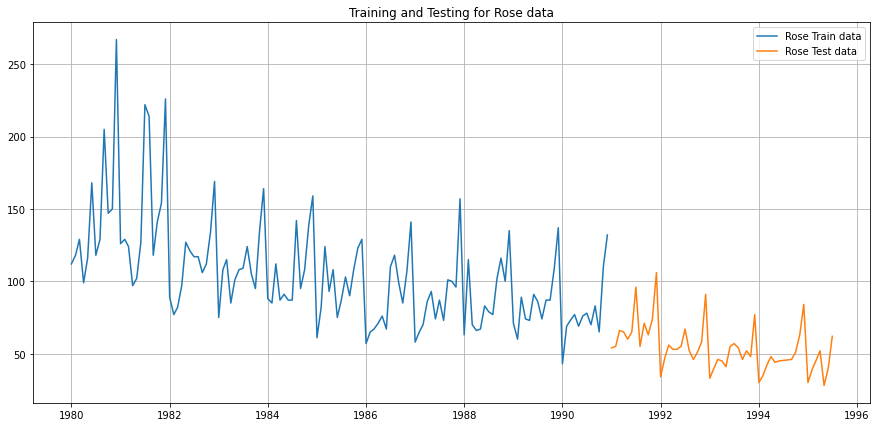

In [57]:
## Plotting the Training data, Test data for Sparkling data

plt.plot(train_rose, label='Rose Train data')
plt.plot(test_rose, label='Rose Test data')
plt.legend(loc='best')
plt.grid()
plt.title('Training and Testing for Rose data');

# 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

In [62]:
#Linear regression for sparkle data
train_time_sparkling = [i+1 for i in range(len(train_sparkle))]
test_time_sparkling = [i+133 for i in range(len(test_sparkle))]
print('Training Time instance for Sparkling','\n',train_time_sparkling)
print('Test Time instance for Sparkling','\n',test_time_sparkling)

Training Time instance for Sparkling 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance for Sparkling 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [60]:
LinearRegression_train_sparkling = train_sparkle.copy()
LinearRegression_test_sparkling = test_sparkle.copy()

In [61]:
LinearRegression_train_sparkling['time'] = train_time_sparkling
LinearRegression_test_sparkling['time'] = test_time_sparkling

print('First few rows of Training Data for Sparkling','\n',LinearRegression_train_sparkling.head(),'\n')
print('Last few rows of Training Data for Sparkling','\n',LinearRegression_train_sparkling.tail(),'\n')
print('First few rows of Test Data for Sparkling','\n',LinearRegression_test_sparkling.head(),'\n')
print('Last few rows of Test Data for Sparkling','\n',LinearRegression_test_sparkling.tail(),'\n')

First few rows of Training Data for Sparkling 
             Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5 

Last few rows of Training Data for Sparkling 
             Sparkling  time
YearMonth                  
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132 

First few rows of Test Data for Sparkling 
             Sparkling  time
YearMonth                  
1991-01-01       1902   133
1991-02-01       2049   134
1991-03-01       1874   135
1991-04-01       1279   136
1991-05-01       1432   137 

Last few rows of Test Data for Sparkling 
             Sparkling  time
YearMonth                  
1995-03-01       1897   183
1995-04-01       1862   184
1995-05-01       1670   185
1995-06-01       1688   186
1995-07-01       2031   187 



In [63]:
from sklearn.linear_model import LinearRegression

In [65]:
lr_sparkling = LinearRegression()

In [66]:
lr_sparkling.fit(LinearRegression_train_sparkling[['time']],LinearRegression_train_sparkling['Sparkling'].values)

LinearRegression()

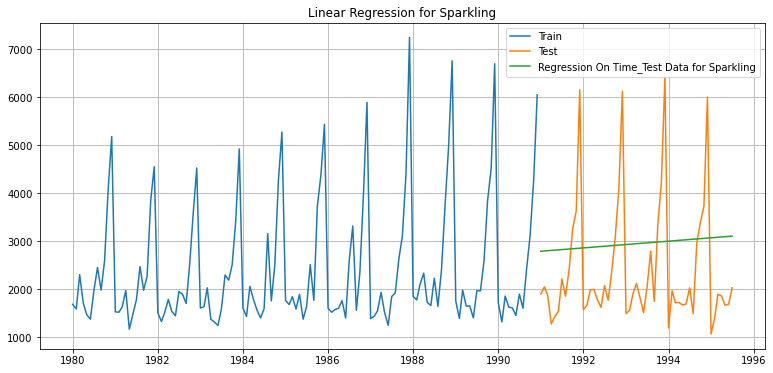

In [68]:
test_predictions_lr_sparkling  = lr_sparkling.predict(LinearRegression_test_sparkling[['time']])
LinearRegression_test_sparkling['RegOnTime'] = test_predictions_lr_sparkling

plt.figure(figsize=(13,6))
plt.plot(train_sparkle['Sparkling'], label='Train')
plt.plot(test_sparkle['Sparkling'], label='Test')
plt.plot(LinearRegression_test_sparkling['RegOnTime'], label='Regression On Time_Test Data for Sparkling')
plt.legend(loc='best')
plt.grid();
plt.title('Linear Regression for Sparkling');

In [70]:
## Test Data - RMSE
from sklearn import metrics
rmse_lr_test_sparkling = metrics.mean_squared_error(test_sparkle['Sparkling'],test_predictions_lr_sparkling,squared=False)
print("For RegressionOnTime forecast on the Test Data for Sparkling,  RMSE is %3.3f" %(rmse_lr_test_sparkling))

For RegressionOnTime forecast on the Test Data for Sparkling,  RMSE is 1389.135


In [72]:
resultsDf = pd.DataFrame({'Test RMSE-Sparkling': [metrics.mean_squared_error(test_sparkle['Sparkling'],test_predictions_lr_sparkling,squared=False)]}
                           ,index=['Linear Regression'])
resultsDf

Test RMSE-Sparkling
Linear Regression          1389.135175

In [73]:
#linear regression for rose data
train_time_rose = [i+1 for i in range(len(train_rose))]
test_time_rose = [i+133 for i in range(len(test_rose))]
print('Training Time instance for Rose','\n',train_time_rose)
print('Test Time instance for Rose','\n',test_time_rose)

Training Time instance for Rose 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance for Rose 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [74]:
LinearRegression_train_rose = train_rose.copy()
LinearRegression_test_rose = test_rose.copy()

In [75]:
LinearRegression_train_rose['time'] = train_time_rose
LinearRegression_test_rose['time'] = test_time_rose

print('First few rows of Training Data for Rose','\n',LinearRegression_train_rose.head(),'\n')
print('Last few rows of Training Data for Rose','\n',LinearRegression_train_rose.tail(),'\n')
print('First few rows of Test Data for Rose','\n',LinearRegression_test_rose.head(),'\n')
print('Last few rows of Test Data for Rose','\n',LinearRegression_test_rose.tail(),'\n')

First few rows of Training Data for Rose 
              Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5 

Last few rows of Training Data for Rose 
              Rose  time
YearMonth              
1990-08-01   70.0   128
1990-09-01   83.0   129
1990-10-01   65.0   130
1990-11-01  110.0   131
1990-12-01  132.0   132 

First few rows of Test Data for Rose 
             Rose  time
YearMonth             
1991-01-01  54.0   133
1991-02-01  55.0   134
1991-03-01  66.0   135
1991-04-01  65.0   136
1991-05-01  60.0   137 

Last few rows of Test Data for Rose 
             Rose  time
YearMonth             
1995-03-01  45.0   183
1995-04-01  52.0   184
1995-05-01  28.0   185
1995-06-01  40.0   186
1995-07-01  62.0   187 



In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
lr_rose = LinearRegression()

In [78]:
lr_rose.fit(LinearRegression_train_rose[['time']],LinearRegression_train_rose['Rose'].values)

LinearRegression()

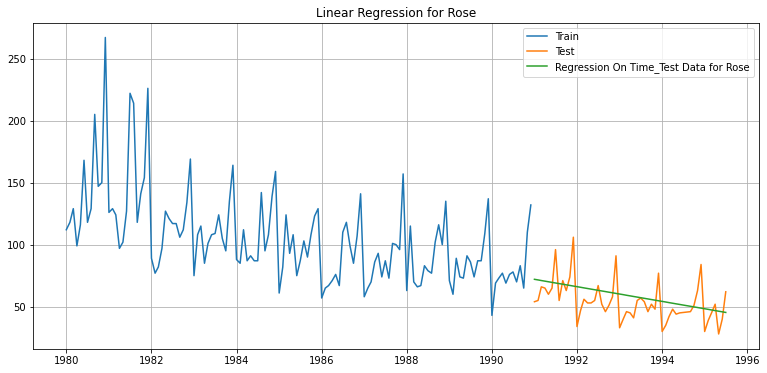

In [79]:
test_predictions_lr_rose = lr_rose.predict(LinearRegression_test_rose[['time']])
LinearRegression_test_rose['RegOnTime'] = test_predictions_lr_rose

plt.figure(figsize=(13,6))
plt.plot(train_rose['Rose'], label='Train')
plt.plot(test_rose['Rose'], label='Test')
plt.plot(LinearRegression_test_rose['RegOnTime'], label='Regression On Time_Test Data for Rose')
plt.legend(loc='best')
plt.grid();
plt.title('Linear Regression for Rose');

In [81]:
from sklearn import metrics
## Test Data - RMSE

rmse_lr_test_rose = metrics.mean_squared_error(test_rose['Rose'],test_predictions_lr_rose,squared=False)
print("For RegressionOnTime forecast on the Test Data for Rose,  RMSE is %3.3f" %(rmse_lr_test_rose))

For RegressionOnTime forecast on the Test Data for Rose,  RMSE is 15.269


In [83]:
resultsDf_r = pd.DataFrame({'Test RMSE-Rose': [metrics.mean_squared_error(test_rose['Rose'],test_predictions_lr_rose,squared=False)]}
                           ,index=['Linear Regression'])
resultsDf_r

Test RMSE-Rose
Linear Regression       15.268955

In [84]:
#Naive Approach - Sparkle
NaiveModel_train_sparkling = train_sparkle.copy()
NaiveModel_test_sparkling = test_sparkle.copy()

In [85]:
NaiveModel_test_sparkling['naive'] = np.asarray(train_sparkle['Sparkling'])[len(np.asarray(train_sparkle['Sparkling']))-1]
NaiveModel_test_sparkling['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

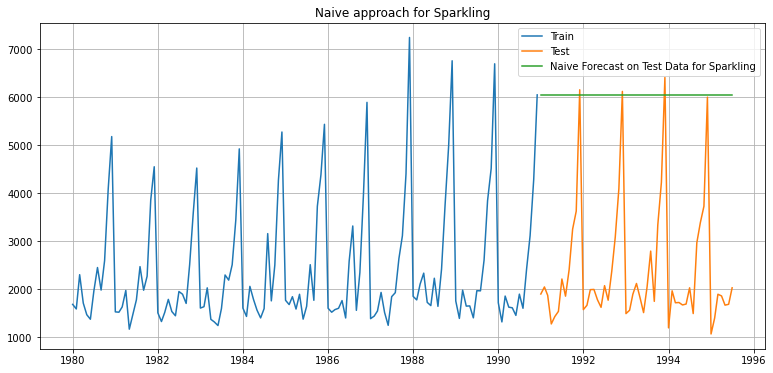

In [86]:
plt.figure(figsize=(13,6))
plt.plot(NaiveModel_train_sparkling['Sparkling'], label='Train')
plt.plot(test_sparkle['Sparkling'], label='Test')
plt.plot(NaiveModel_test_sparkling['naive'], label='Naive Forecast on Test Data for Sparkling')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();
plt.title('Naive approach for Sparkling');

In [87]:
## Test Data - RMSE

rmse_naive_test_sparkling = metrics.mean_squared_error(test_sparkle['Sparkling'],NaiveModel_test_sparkling['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data for Sparkling,  RMSE is %3.3f" %(rmse_naive_test_sparkling))

For RegressionOnTime forecast on the Test Data for Sparkling,  RMSE is 3864.279


In [88]:
resultsDf_temp = pd.DataFrame({'Test RMSE-Sparkling': [metrics.mean_squared_error(test_sparkle['Sparkling'],NaiveModel_test_sparkling['naive'],squared=False)]}
                           ,index=['Naive Approach'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE-Sparkling
Linear Regression          1389.135175
Naive Approach             3864.279352

In [89]:
#Naive Approach - rose 
NaiveModel_train_rose = train_rose.copy()
NaiveModel_test_rose = test_rose.copy()

In [91]:
NaiveModel_test_rose['naive'] = np.asarray(train_rose['Rose'])[len(np.asarray(train_rose['Rose']))-1]
NaiveModel_test_rose['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

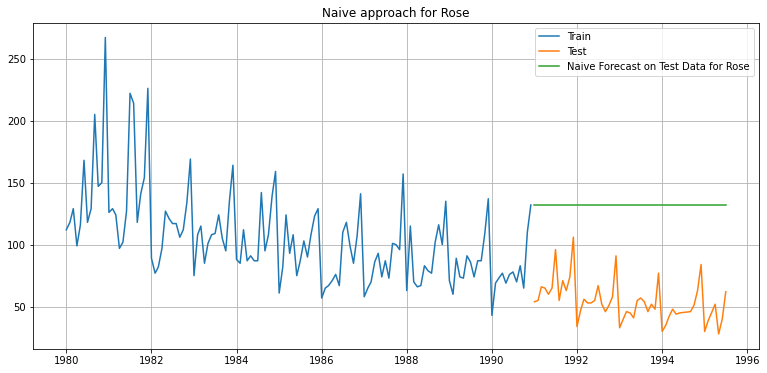

In [92]:
plt.figure(figsize=(13,6))
plt.plot(NaiveModel_train_rose['Rose'], label='Train')
plt.plot(test_rose['Rose'], label='Test')
plt.plot(NaiveModel_test_rose['naive'], label='Naive Forecast on Test Data for Rose')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();
plt.title('Naive approach for Rose');

In [94]:
## Test Data - RMSE

rmse_naive_test_rose = metrics.mean_squared_error(test_rose['Rose'],NaiveModel_test_rose['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data for Rose,  RMSE is %3.3f" %(rmse_naive_test_rose))

For RegressionOnTime forecast on the Test Data for Rose,  RMSE is 79.719


In [95]:
temp_resultsDf = pd.DataFrame({'Test RMSE-Rose':[metrics.mean_squared_error(test_rose['Rose'],NaiveModel_test_rose['naive'],squared=False)]}
                              ,index=['Naive Approach'])

resultsDf_r = pd.concat([resultsDf_r, temp_resultsDf])
resultsDf_r

Test RMSE-Rose
Linear Regression       15.268955
Naive Approach          79.718773

In [96]:
#simple-Average(Sparkle)
SimpleAverage_train_sparkling = train_sparkle.copy()
SimpleAverage_test_sparkling = test_sparkle.copy()

In [97]:
SimpleAverage_test_sparkling['mean_forecast'] = SimpleAverage_train_sparkling['Sparkling'].mean()
SimpleAverage_test_sparkling.head()

Sparkling  mean_forecast
YearMonth                           
1991-01-01       1902    2403.780303
1991-02-01       2049    2403.780303
1991-03-01       1874    2403.780303
1991-04-01       1279    2403.780303
1991-05-01       1432    2403.780303

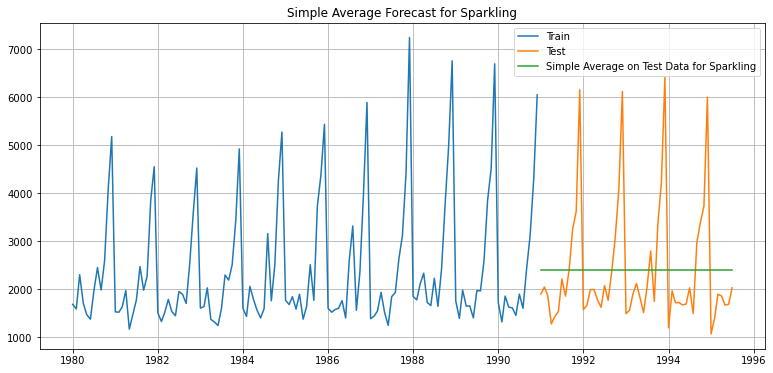

In [98]:
plt.figure(figsize=(13,6))
plt.plot(SimpleAverage_train_sparkling['Sparkling'], label='Train')
plt.plot(SimpleAverage_test_sparkling['Sparkling'], label='Test')
plt.plot(SimpleAverage_test_sparkling['mean_forecast'], label='Simple Average on Test Data for Sparkling')
plt.legend(loc='best')
plt.title("Simple Average Forecast for Sparkling")
plt.grid();

In [99]:
## Test Data - RMSE 

rmse_sa_test_sparkling = metrics.mean_squared_error(SimpleAverage_test_sparkling['Sparkling'],SimpleAverage_test_sparkling['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data for Sparkling,  RMSE is %3.3f" %(rmse_sa_test_sparkling))

For Simple Average forecast on the Test Data for Sparkling,  RMSE is 1275.082


In [100]:
resultsDf_temp = pd.DataFrame({'Test RMSE-Sparkling': [metrics.mean_squared_error(SimpleAverage_test_sparkling['Sparkling'],
                                                                                  SimpleAverage_test_sparkling['mean_forecast'],
                                                                                  squared=False)]}
                                                                                  ,index=['Simple Average'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE-Sparkling
Linear Regression          1389.135175
Naive Approach             3864.279352
Simple Average             1275.081804

In [102]:
#simple-average(rose)
SimpleAverage_train_rose = train_rose.copy()
SimpleAverage_test_rose = test_rose.copy()

In [103]:
SimpleAverage_test_rose['mean_forecast'] = SimpleAverage_train_rose['Rose'].mean()
SimpleAverage_test_rose.head()

Rose  mean_forecast
YearMonth                      
1991-01-01  54.0     104.939394
1991-02-01  55.0     104.939394
1991-03-01  66.0     104.939394
1991-04-01  65.0     104.939394
1991-05-01  60.0     104.939394

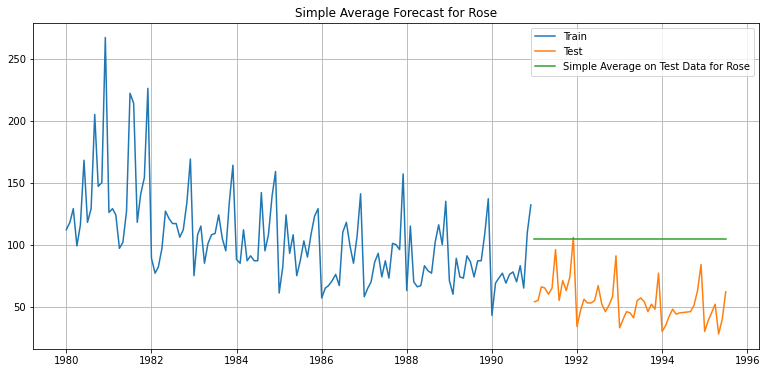

In [104]:
plt.figure(figsize=(13,6))
plt.plot(SimpleAverage_train_rose['Rose'], label='Train')
plt.plot(SimpleAverage_test_rose['Rose'], label='Test')
plt.plot(SimpleAverage_test_rose['mean_forecast'], label='Simple Average on Test Data for Rose')
plt.legend(loc='best')
plt.title("Simple Average Forecast for Rose")
plt.grid();

In [105]:
## Test Data - RMSE 

rmse_sa_test_rose = metrics.mean_squared_error(SimpleAverage_test_rose['Rose'],SimpleAverage_test_rose['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data for Rose,  RMSE is %3.3f" %(rmse_sa_test_rose))

For Simple Average forecast on the Test Data for Rose,  RMSE is 53.461


In [106]:
temp_resultsDf = pd.DataFrame({'Test RMSE-Rose':[metrics.mean_squared_error(SimpleAverage_test_rose['Rose']
                              ,SimpleAverage_test_rose['mean_forecast'],squared=False)]}
                              ,index=['Simple Average'])

resultsDf_r = pd.concat([resultsDf_r, temp_resultsDf])
resultsDf_r

Test RMSE-Rose
Linear Regression       15.268955
Naive Approach          79.718773
Simple Average          53.460570

In [107]:
#Moving-average(sparkle)
MovingAverage_sparkling = sparkle.copy()
MovingAverage_sparkling.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [108]:
MovingAverage_sparkling['Trailing_2'] = MovingAverage_sparkling['Sparkling'].rolling(2).mean()
MovingAverage_sparkling['Trailing_4'] = MovingAverage_sparkling['Sparkling'].rolling(4).mean()
MovingAverage_sparkling['Trailing_6'] = MovingAverage_sparkling['Sparkling'].rolling(6).mean()
MovingAverage_sparkling['Trailing_9'] = MovingAverage_sparkling['Sparkling'].rolling(9).mean()

MovingAverage_sparkling.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                            
1980-01-01       1686         NaN         NaN         NaN         NaN
1980-02-01       1591      1638.5         NaN         NaN         NaN
1980-03-01       2304      1947.5         NaN         NaN         NaN
1980-04-01       1712      2008.0     1823.25         NaN         NaN
1980-05-01       1471      1591.5     1769.50         NaN         NaN

Text(0.5, 1.0, 'Moving Average for Sparkling')

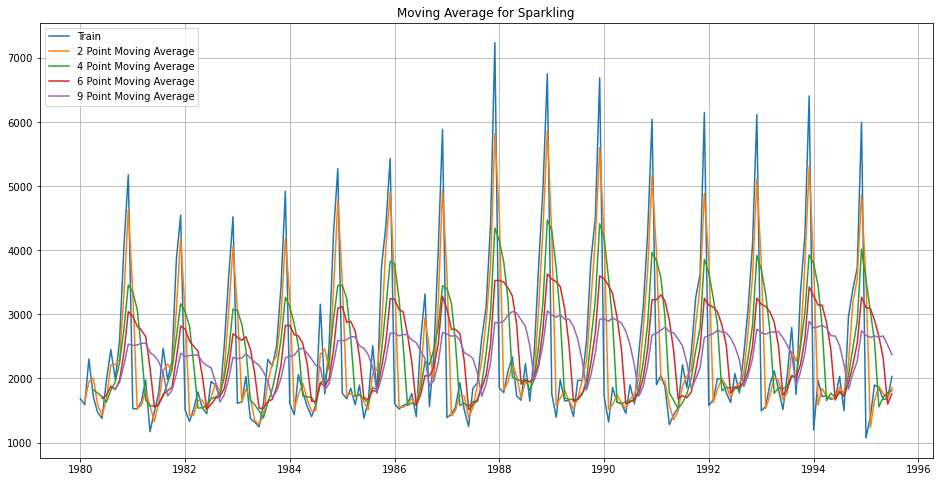

In [109]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage_sparkling['Sparkling'],label='Train')
plt.plot(MovingAverage_sparkling['Trailing_2'],label='2 Point Moving Average')
plt.plot(MovingAverage_sparkling['Trailing_4'],label='4 Point Moving Average')
plt.plot(MovingAverage_sparkling['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage_sparkling['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();
plt.title("Moving Average for Sparkling")

In [110]:
#Creating train and test set 

trailing_MovingAverage_train_sparkling = MovingAverage_sparkling[MovingAverage_sparkling.index.year < 1991] 
trailing_MovingAverage_test_sparkling = MovingAverage_sparkling[MovingAverage_sparkling.index.year >= 1991]

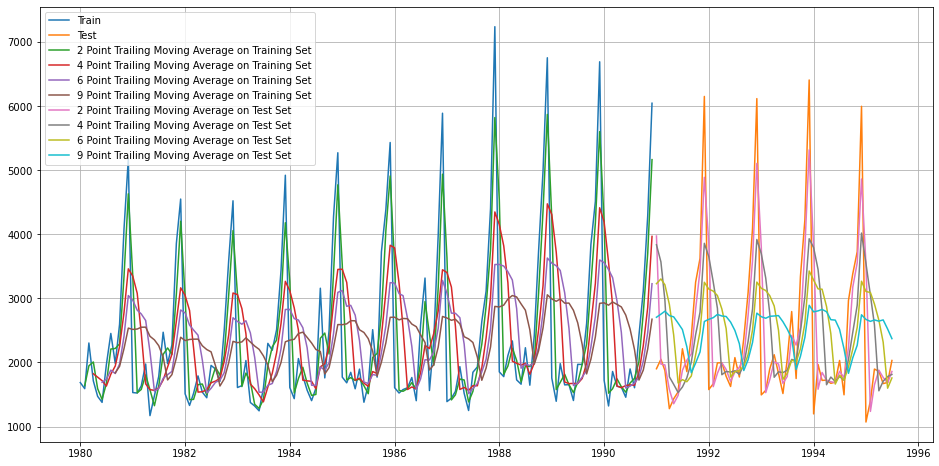

In [111]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train_sparkling['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test_sparkling['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train_sparkling['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train_sparkling['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train_sparkling['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train_sparkling['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test_sparkling['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test_sparkling['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test_sparkling['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test_sparkling['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [113]:


rmse_ma_test_2_sparkling = metrics.mean_squared_error(test_sparkle['Sparkling'],trailing_MovingAverage_test_sparkling['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data for Sparkling,  RMSE is %3.3f" %(rmse_ma_test_2_sparkling))



rmse_ma_test_4_sparkling = metrics.mean_squared_error(test_sparkle['Sparkling'],trailing_MovingAverage_test_sparkling['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data for Sparkling,  RMSE is %3.3f" %(rmse_ma_test_4_sparkling))



rmse_ma_test_6_sparkling = metrics.mean_squared_error(test_sparkle['Sparkling'],trailing_MovingAverage_test_sparkling['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data for Sparkling,  RMSE is %3.3f" %(rmse_ma_test_6_sparkling))


rmse_ma_test_9_sparkling = metrics.mean_squared_error(test_sparkle['Sparkling'],trailing_MovingAverage_test_sparkling['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data for Sparkling,  RMSE is %3.3f " %(rmse_ma_test_9_sparkling))

For 2 point Moving Average Model forecast on the Training Data for Sparkling,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data for Sparkling,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data for Sparkling,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data for Sparkling,  RMSE is 1346.278 


In [114]:
resultsDf_temp = pd.DataFrame({'Test RMSE-Sparkling':  [rmse_ma_test_2_sparkling,rmse_ma_test_4_sparkling
                                          ,rmse_ma_test_6_sparkling,rmse_ma_test_9_sparkling]}
                                          ,index=['2point Trailing Moving Average','4point Trailing Moving Average'
                                          ,'6point Trailing Moving Average','9point Trailing Moving Average'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE-Sparkling
Linear Regression                       1389.135175
Naive Approach                          3864.279352
Simple Average                          1275.081804
2point Trailing Moving Average           813.400684
4point Trailing Moving Average          1156.589694
6point Trailing Moving Average          1283.927428
9point Trailing Moving Average          1346.278315

In [115]:
#moving-average(rose)
MovingAverage_rose = rose.copy()
MovingAverage_rose.head()  

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [116]:
MovingAverage_rose['Trailing_2'] = MovingAverage_rose['Rose'].rolling(2).mean()
MovingAverage_rose['Trailing_4'] = MovingAverage_rose['Rose'].rolling(4).mean()
MovingAverage_rose['Trailing_6'] = MovingAverage_rose['Rose'].rolling(6).mean()
MovingAverage_rose['Trailing_9'] = MovingAverage_rose['Rose'].rolling(9).mean()

MovingAverage_rose.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                        
1980-01-01  112.0         NaN         NaN         NaN         NaN
1980-02-01  118.0       115.0         NaN         NaN         NaN
1980-03-01  129.0       123.5         NaN         NaN         NaN
1980-04-01   99.0       114.0       114.5         NaN         NaN
1980-05-01  116.0       107.5       115.5         NaN         NaN

Text(0.5, 1.0, 'Moving Average for Rose')

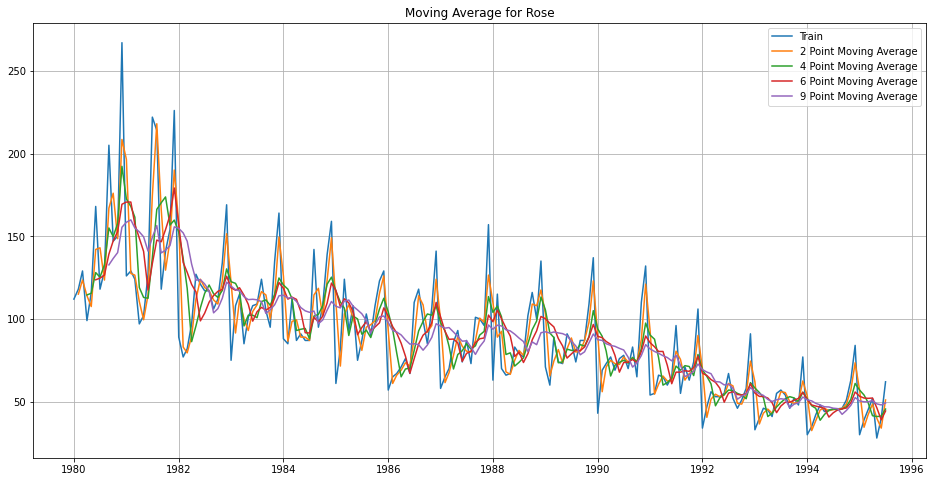

In [117]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage_rose['Rose'], label='Train')
plt.plot(MovingAverage_rose['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage_rose['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage_rose['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage_rose['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();
plt.title("Moving Average for Rose")

In [118]:
#Creating train and test set 
trailing_MovingAverage_train_rose=MovingAverage_rose[MovingAverage_rose.index.year < 1991] 
trailing_MovingAverage_test_rose=MovingAverage_rose[MovingAverage_rose.index.year >= 1991]

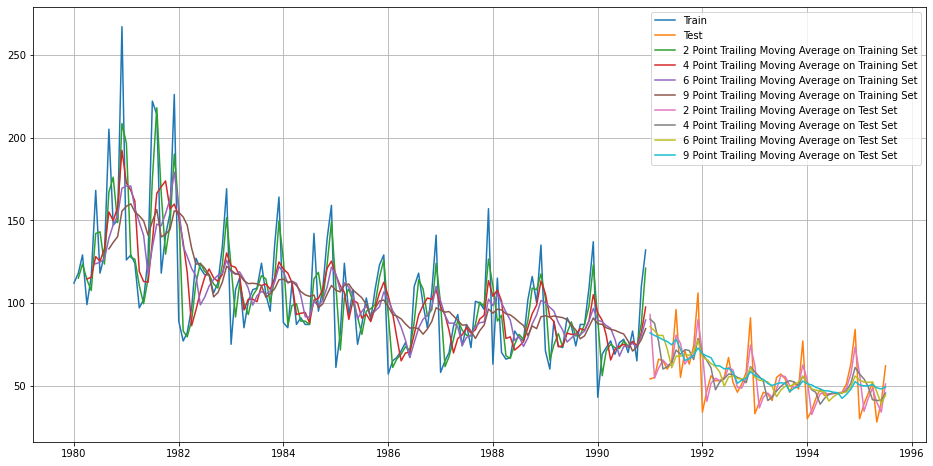

In [119]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train_rose['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test_rose['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train_rose['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train_rose['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train_rose['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train_rose['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test_rose['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test_rose['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test_rose['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test_rose['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [121]:

rmse_ma_test_2_rose = metrics.mean_squared_error(test_rose['Rose'],trailing_MovingAverage_test_rose['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data for Rose,  RMSE is %3.3f" %(rmse_ma_test_2_rose))


rmse_ma_test_4_rose = metrics.mean_squared_error(test_rose['Rose'],trailing_MovingAverage_test_rose['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data for Rose,  RMSE is %3.3f" %(rmse_ma_test_4_rose))


rmse_ma_test_6_rose = metrics.mean_squared_error(test_rose['Rose'],trailing_MovingAverage_test_rose['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data for Rose,  RMSE is %3.3f" %(rmse_ma_test_6_rose))


rmse_ma_test_9_rose = metrics.mean_squared_error(test_rose['Rose'],trailing_MovingAverage_test_rose['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data for Rose,  RMSE is %3.3f " %(rmse_ma_test_9_rose))

For 2 point Moving Average Model forecast on the Training Data for Rose,  RMSE is 11.529
For 4 point Moving Average Model forecast on the Training Data for Rose,  RMSE is 14.451
For 6 point Moving Average Model forecast on the Training Data for Rose,  RMSE is 14.566
For 9 point Moving Average Model forecast on the Training Data for Rose,  RMSE is 14.728 


In [122]:
temp_resultsDf = pd.DataFrame({'Test RMSE-Rose': [rmse_ma_test_2_rose,rmse_ma_test_4_rose
                                          ,rmse_ma_test_6_rose,rmse_ma_test_9_rose]}
                                          ,index=['2point Trailing Moving Average','4point Trailing Moving Average'
                                          ,'6point Trailing Moving Average','9point Trailing Moving Average'])

resultsDf_r = pd.concat([resultsDf_r, temp_resultsDf])
resultsDf_r

Test RMSE-Rose
Linear Regression                    15.268955
Naive Approach                       79.718773
Simple Average                       53.460570
2point Trailing Moving Average       11.529278
4point Trailing Moving Average       14.451403
6point Trailing Moving Average       14.566327
9point Trailing Moving Average       14.727630

In [123]:
#simple exponential smoothing (sparkle)
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [124]:
SES_train = train_sparkle.copy()
SES_test = test_sparkle.copy()

In [125]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

C:\Users\Soundarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Soundarya\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [126]:
model_SES_autofit = model_SES.fit(optimized=True)

C:\Users\Soundarya\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [128]:
model_SES_autofit.params

{'smoothing_level': 0.049607360581862936,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.535750008871,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [129]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(SES_test))
SES_test.head()

Sparkling      predict
YearMonth                         
1991-01-01       1902  2724.932624
1991-02-01       2049  2724.932624
1991-03-01       1874  2724.932624
1991-04-01       1279  2724.932624
1991-05-01       1432  2724.932624

In [130]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(SES_test))
SES_predict

1991-01-01    2724.932624
1991-02-01    2724.932624
1991-03-01    2724.932624
1991-04-01    2724.932624
1991-05-01    2724.932624
1991-06-01    2724.932624
1991-07-01    2724.932624
1991-08-01    2724.932624
1991-09-01    2724.932624
1991-10-01    2724.932624
1991-11-01    2724.932624
1991-12-01    2724.932624
1992-01-01    2724.932624
1992-02-01    2724.932624
1992-03-01    2724.932624
1992-04-01    2724.932624
1992-05-01    2724.932624
1992-06-01    2724.932624
1992-07-01    2724.932624
1992-08-01    2724.932624
1992-09-01    2724.932624
1992-10-01    2724.932624
1992-11-01    2724.932624
1992-12-01    2724.932624
1993-01-01    2724.932624
1993-02-01    2724.932624
1993-03-01    2724.932624
1993-04-01    2724.932624
1993-05-01    2724.932624
1993-06-01    2724.932624
1993-07-01    2724.932624
1993-08-01    2724.932624
1993-09-01    2724.932624
1993-10-01    2724.932624
1993-11-01    2724.932624
1993-12-01    2724.932624
1994-01-01    2724.932624
1994-02-01    2724.932624
1994-03-01  

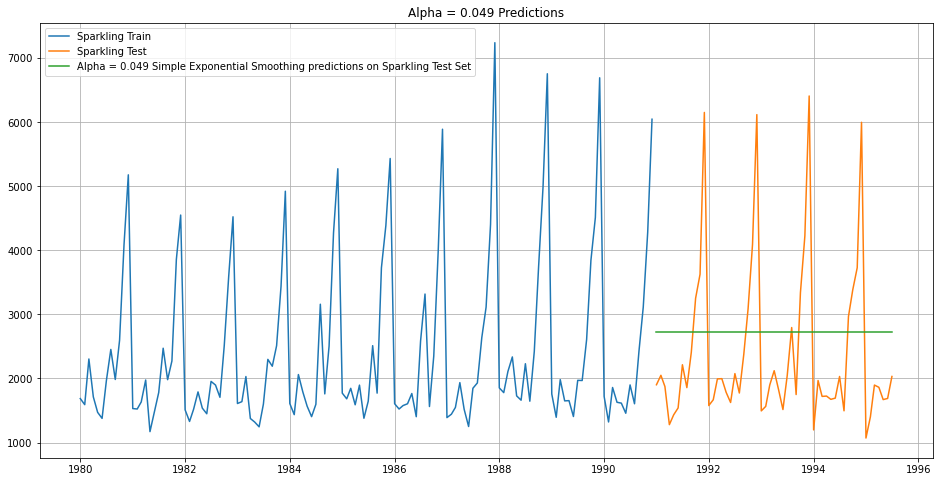

In [131]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Sparkling Train')
plt.plot(SES_test['Sparkling'], label='Sparkling Test')

plt.plot(SES_test['predict'], label='Alpha = 0.049 Simple Exponential Smoothing predictions on Sparkling Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.049 Predictions');

In [132]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [133]:
## Test Data - RMSE
from sklearn import metrics

rmse_SES_test_S = metrics.mean_squared_error(SES_test['Sparkling'],SES_predict,squared=False)
print("For SES forecast on the Sparkling Test Data,  RMSE is %3.3f" %(rmse_SES_test_S))

For SES forecast on the Sparkling Test Data,  RMSE is 1316.035


In [134]:
resultsDf_temp = pd.DataFrame({'Test RMSE-Sparkling':   [metrics.mean_squared_error(SES_test['Sparkling'],
                                                                                    SES_predict,squared=False)]},
                         index=['Alpha=0.049:Simple Exponential Smoothing'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE-Sparkling
Linear Regression                                 1389.135175
Naive Approach                                    3864.279352
Simple Average                                    1275.081804
2point Trailing Moving Average                     813.400684
4point Trailing Moving Average                    1156.589694
6point Trailing Moving Average                    1283.927428
9point Trailing Moving Average                    1346.278315
Alpha=0.049:Simple Exponential Smoothing          1316.035487

In [135]:
#tuning simple exponential smoothing - sparkle

In [136]:
resultsDf_S = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_S

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [137]:
for i in np.arange(0.01,1,0.01):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues 
    SES_test['predict',i] = model_SES_alpha_i.forecast(len(SES_test))
    
    rmse_model_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict',i],squared=False)
    
    rmse_model_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    
    resultsDf_S = resultsDf_S.append({'Alpha Values':i,'Train RMSE':rmse_model_train_i 
                                      ,'Test RMSE':rmse_model_test_i}, ignore_index=True)

In [138]:
resultsDf_S.sort_values(by=['Test RMSE'],ascending=True).head()

Alpha Values   Train RMSE    Test RMSE
1          0.02  1328.406554  1279.495201
0          0.01  1361.997529  1281.032699
2          0.03  1318.846031  1293.110073
3          0.04  1317.138929  1305.462953
4          0.05  1318.429335  1316.411742

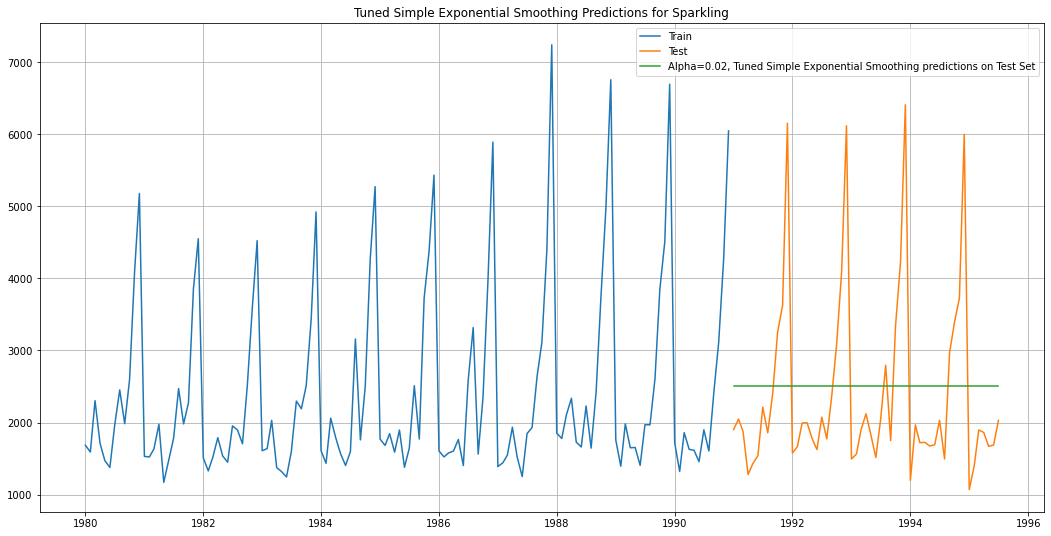

In [139]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict', 0.02], label='Alpha=0.02, Tuned Simple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid()
plt.title('Tuned Simple Exponential Smoothing Predictions for Sparkling');

In [140]:
temp_resultsDf = pd.DataFrame({'Test RMSE-Sparkling':  [resultsDf_S.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                              ,index=['Alpha=0.02:Tuned Simple Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

Test RMSE-Sparkling
Linear Regression                                      1389.135175
Naive Approach                                         3864.279352
Simple Average                                         1275.081804
2point Trailing Moving Average                          813.400684
4point Trailing Moving Average                         1156.589694
6point Trailing Moving Average                         1283.927428
9point Trailing Moving Average                         1346.278315
Alpha=0.049:Simple Exponential Smoothing               1316.035487
Alpha=0.02:Tuned Simple Exponential Smoothing          1279.495201

In [142]:
#simple exp smoothing - rose
SES_train_r = train_rose.copy()
SES_test_r = test_rose.copy()

In [143]:
model_SES_R = SimpleExpSmoothing(SES_train_r['Rose'])

C:\Users\Soundarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Soundarya\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [145]:
model_SES_autofit_R = model_SES_R.fit(optimized=True)

In [146]:
model_SES_autofit_R.params

{'smoothing_level': 0.0987493111726833,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38720226208358,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [147]:
SES_test_r['predict'] = model_SES_autofit_R.forecast(steps = len(SES_test_r))
SES_test_r.head()

Rose    predict
YearMonth                  
1991-01-01  54.0  87.104983
1991-02-01  55.0  87.104983
1991-03-01  66.0  87.104983
1991-04-01  65.0  87.104983
1991-05-01  60.0  87.104983

In [149]:

SES_predict_R = model_SES_autofit_R.forecast(steps=len(SES_test_r))
SES_predict_R

1991-01-01    87.104983
1991-02-01    87.104983
1991-03-01    87.104983
1991-04-01    87.104983
1991-05-01    87.104983
1991-06-01    87.104983
1991-07-01    87.104983
1991-08-01    87.104983
1991-09-01    87.104983
1991-10-01    87.104983
1991-11-01    87.104983
1991-12-01    87.104983
1992-01-01    87.104983
1992-02-01    87.104983
1992-03-01    87.104983
1992-04-01    87.104983
1992-05-01    87.104983
1992-06-01    87.104983
1992-07-01    87.104983
1992-08-01    87.104983
1992-09-01    87.104983
1992-10-01    87.104983
1992-11-01    87.104983
1992-12-01    87.104983
1993-01-01    87.104983
1993-02-01    87.104983
1993-03-01    87.104983
1993-04-01    87.104983
1993-05-01    87.104983
1993-06-01    87.104983
1993-07-01    87.104983
1993-08-01    87.104983
1993-09-01    87.104983
1993-10-01    87.104983
1993-11-01    87.104983
1993-12-01    87.104983
1994-01-01    87.104983
1994-02-01    87.104983
1994-03-01    87.104983
1994-04-01    87.104983
1994-05-01    87.104983
1994-06-01    87

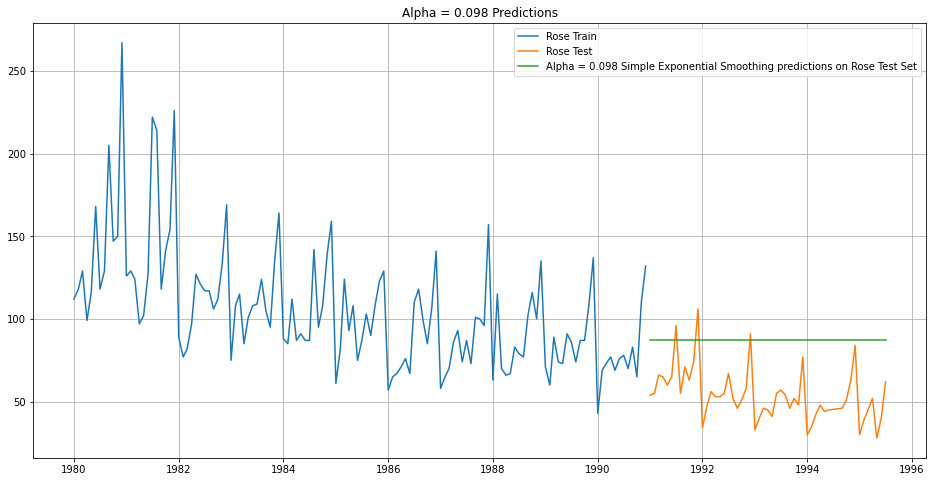

In [150]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train_r['Rose'], label='Rose Train')
plt.plot(SES_test_r['Rose'], label='Rose Test')

plt.plot(SES_test_r['predict'], label='Alpha = 0.098 Simple Exponential Smoothing predictions on Rose Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.098 Predictions');

In [151]:
## Test Data - RMSE
from sklearn import metrics

rmse_SES_test_R = metrics.mean_squared_error(SES_test_r['Rose'],SES_predict_R,squared=False)
print("For SES forecast on the Rose Test Data,  RMSE is %3.3f" %(rmse_SES_test_R))

For SES forecast on the Rose Test Data,  RMSE is 36.796


In [152]:
temp_resultsDf = pd.DataFrame({'Test RMSE-Rose': [metrics.mean_squared_error(SES_test_r['Rose'],SES_predict_R,squared=False)]},
                         index=['Alpha= 0.098:Simple Exponential Smoothing'])
resultsDf_r = pd.concat([resultsDf_r, temp_resultsDf])
resultsDf_r

Test RMSE-Rose
Linear Regression                               15.268955
Naive Approach                                  79.718773
Simple Average                                  53.460570
2point Trailing Moving Average                  11.529278
4point Trailing Moving Average                  14.451403
6point Trailing Moving Average                  14.566327
9point Trailing Moving Average                  14.727630
Alpha= 0.098:Simple Exponential Smoothing       36.796227

In [153]:
resultsDf_R = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_R

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [154]:
for i in np.arange(0.01,1,0.01):
    model_SES_alpha_i =  model_SES_R.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train_r['predict',i] = model_SES_alpha_i.fittedvalues 
    SES_test_r['predict',i] = model_SES_alpha_i.forecast(len(SES_test_r))
    
    rmse_model_train_i = metrics.mean_squared_error(SES_train_r['Rose'],SES_train_r['predict',i],squared=False)
    
    rmse_model_test_i = metrics.mean_squared_error(SES_test_r['Rose'],SES_test_r['predict',i],squared=False)
    
    resultsDf_R = resultsDf_R.append({'Alpha Values':i,'Train RMSE':rmse_model_train_i 
                                      ,'Test RMSE':rmse_model_test_i}, ignore_index=True)

In [155]:
resultsDf_R.sort_values(by=['Test RMSE'],ascending=True).head()

Alpha Values  Train RMSE  Test RMSE
6          0.07   32.046904  36.435772
7          0.08   31.936243  36.462965
5          0.06   32.209657  36.580469
8          0.09   31.862435  36.604118
9          0.10   31.815610  36.828033

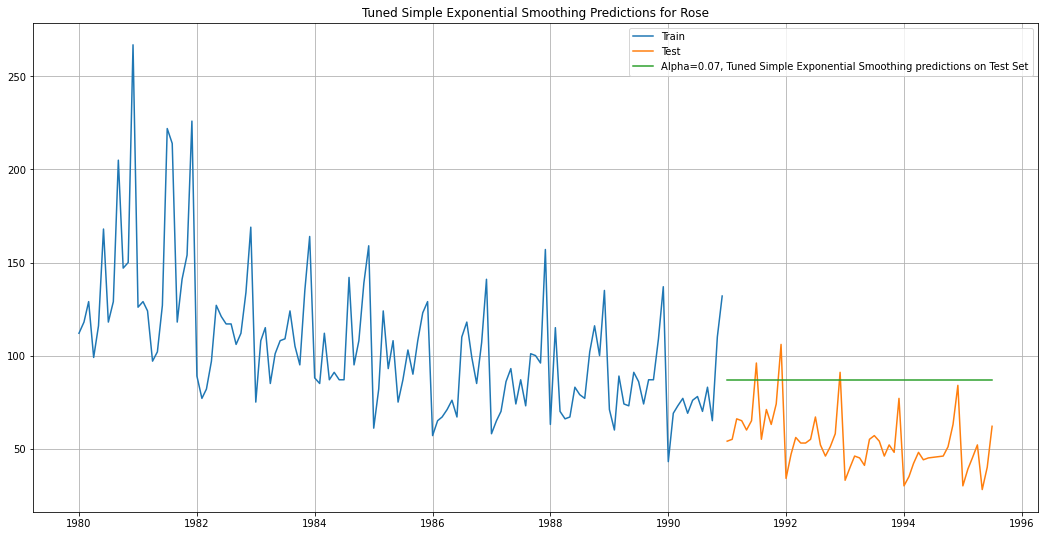

In [156]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train_r['Rose'], label='Train')
plt.plot(SES_test_r['Rose'], label='Test')

plt.plot(SES_test_r['predict', 0.08], label='Alpha=0.07, Tuned Simple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid()
plt.title('Tuned Simple Exponential Smoothing Predictions for Rose');

In [157]:
temp_resultsDf = pd.DataFrame({'Test RMSE-Rose': [resultsDf_R.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                              ,index=['Alpha=0.07:Tuned Simple Exponential Smoothing'])

resultsDf_r = pd.concat([resultsDf_r, temp_resultsDf])
resultsDf_r

Test RMSE-Rose
Linear Regression                                   15.268955
Naive Approach                                      79.718773
Simple Average                                      53.460570
2point Trailing Moving Average                      11.529278
4point Trailing Moving Average                      14.451403
6point Trailing Moving Average                      14.566327
9point Trailing Moving Average                      14.727630
Alpha= 0.098:Simple Exponential Smoothing           36.796227
Alpha=0.07:Tuned Simple Exponential Smoothing       36.435772

In [158]:
#double exp smoothing (des) - sparkling 
DES_train_s = train_sparkle.copy()
DES_test_s = test_sparkle.copy()

In [159]:
# Initializing the Double Exponential Smoothing Model
model_DES_s = Holt(DES_train_s, initialization_method='estimated')
# Fitting the model
model_DES_s = model_DES_s.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES_s.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.6649999999999999, 'smoothing_trend': 0.0001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1502.1999999999991, 'initial_trend': 74.87272727272739, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Soundarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Soundarya\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [160]:
# Forecasting using this model for the duration of the test set
DES_predict_s =  model_DES_s.forecast(len(DES_test_s))
DES_predict_s

1991-01-01    5401.733026
1991-02-01    5476.005230
1991-03-01    5550.277433
1991-04-01    5624.549637
1991-05-01    5698.821840
1991-06-01    5773.094044
1991-07-01    5847.366248
1991-08-01    5921.638451
1991-09-01    5995.910655
1991-10-01    6070.182858
1991-11-01    6144.455062
1991-12-01    6218.727266
1992-01-01    6292.999469
1992-02-01    6367.271673
1992-03-01    6441.543876
1992-04-01    6515.816080
1992-05-01    6590.088284
1992-06-01    6664.360487
1992-07-01    6738.632691
1992-08-01    6812.904894
1992-09-01    6887.177098
1992-10-01    6961.449302
1992-11-01    7035.721505
1992-12-01    7109.993709
1993-01-01    7184.265912
1993-02-01    7258.538116
1993-03-01    7332.810320
1993-04-01    7407.082523
1993-05-01    7481.354727
1993-06-01    7555.626930
1993-07-01    7629.899134
1993-08-01    7704.171338
1993-09-01    7778.443541
1993-10-01    7852.715745
1993-11-01    7926.987948
1993-12-01    8001.260152
1994-01-01    8075.532356
1994-02-01    8149.804559
1994-03-01  

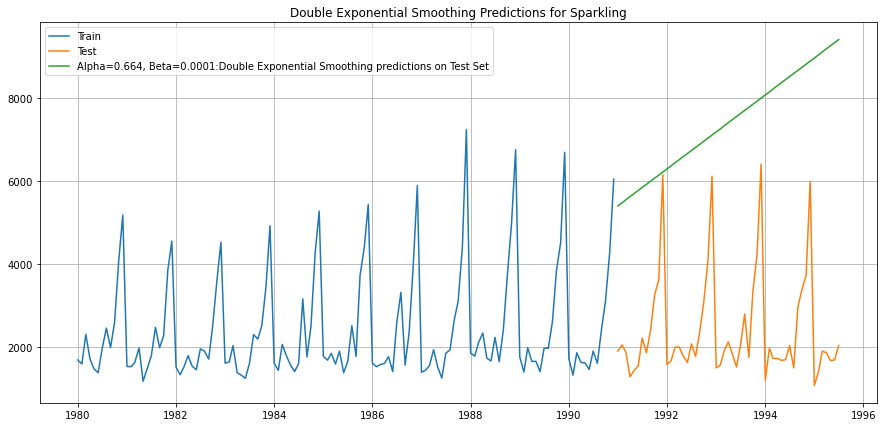

In [161]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(DES_train_s, label='Train')
plt.plot(DES_test_s, label='Test')

plt.plot(DES_predict_s, label='Alpha=0.664, Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Double Exponential Smoothing Predictions for Sparkling');

In [162]:
print('DES RMSE:',mean_squared_error(DES_test_s.values,DES_predict_s.values,squared=False))

DES RMSE: 5291.8798332269125


In [163]:
resultsDf_temp = pd.DataFrame({'Test RMSE-Sparkling': [mean_squared_error(DES_test_s.values,DES_predict_s.values,squared=False)]}
                           ,index=['Alpha=0.66,Beta=0.0001:DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE-Sparkling
Linear Regression                                          1389.135175
Naive Approach                                             3864.279352
Simple Average                                             1275.081804
2point Trailing Moving Average                              813.400684
4point Trailing Moving Average                             1156.589694
6point Trailing Moving Average                             1283.927428
9point Trailing Moving Average                             1346.278315
Alpha=0.049:Simple Exponential Smoothing                   1316.035487
Alpha=0.02:Tuned Simple Exponential Smoothing              1279.495201
Alpha=0.66,Beta=0.0001:DoubleExponentialSmoothing          5291.879833

In [164]:
resultsDf_blank = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_blank

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [165]:
model_DES_s = Holt(DES_train_s['Sparkling'])
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES_s.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train_s['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test_s['predict',i,j] = model_DES_alpha_i_j.forecast(steps=1000)
        
        rmse_model2_train = metrics.mean_squared_error(DES_train_s['Sparkling'],DES_train_s['predict',i,j],squared=False)
        
        rmse_model2_test = metrics.mean_squared_error(DES_test_s['Sparkling'],DES_test_s['predict',i,j],squared=False)
        
        resultsDf_blank = resultsDf_blank.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model2_train
                                          ,'Test RMSE':rmse_model2_test}, ignore_index=True)

C:\Users\Soundarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Soundarya\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [166]:
resultsDf_blank.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values   Train RMSE    Test RMSE
0            0.1          0.1  1382.520870  1778.564670
1            0.1          0.2  1413.598835  2599.439986
10           0.2          0.1  1418.041591  3611.763322
2            0.1          0.3  1445.762015  4293.084674
20           0.3          0.1  1431.169601  5908.185554

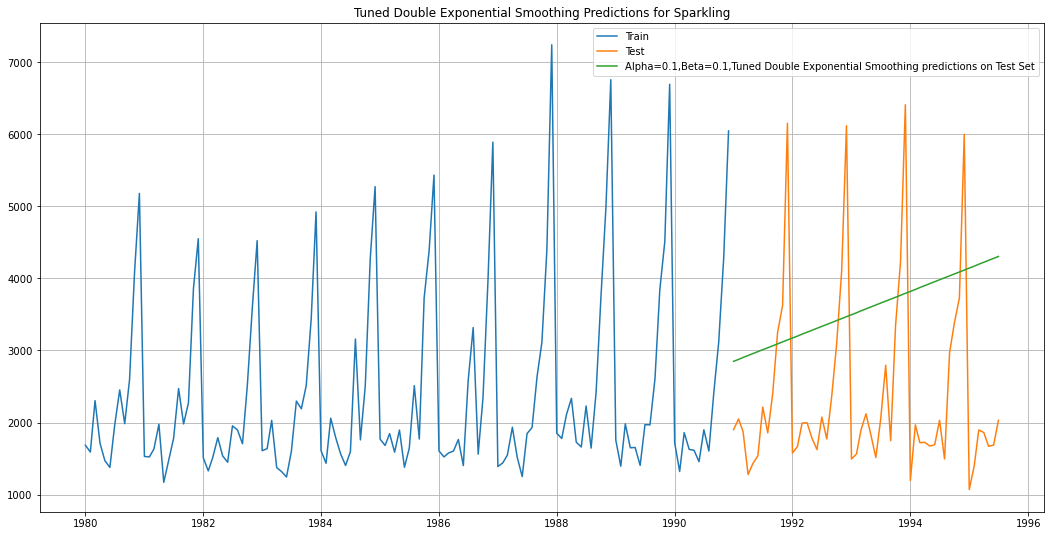

In [167]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train_s['Sparkling'], label='Train')
plt.plot(DES_test_s['Sparkling'], label='Test')

plt.plot(DES_test_s['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,Tuned Double Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid()
plt.title('Tuned Double Exponential Smoothing Predictions for Sparkling');

In [168]:
resultsDf_temp = pd.DataFrame({'Test RMSE-Sparkling': [resultsDf_blank.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.1,Beta=0.1:Tuned Double Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE-Sparkling
Linear Regression                                           1389.135175
Naive Approach                                              3864.279352
Simple Average                                              1275.081804
2point Trailing Moving Average                               813.400684
4point Trailing Moving Average                              1156.589694
6point Trailing Moving Average                              1283.927428
9point Trailing Moving Average                              1346.278315
Alpha=0.049:Simple Exponential Smoothing                    1316.035487
Alpha=0.02:Tuned Simple Exponential Smoothing               1279.495201
Alpha=0.66,Beta=0.0001:DoubleExponentialSmoothing           5291.879833
Alpha=0.1,Beta=0.1:Tuned Double Exponential Smo...          1778.564670

In [169]:
#double exp smoothing (rose)
DES_train_r = train_rose.copy()
DES_test_r = test_rose.copy()

In [170]:
# Initializing the Double Exponential Smoothing Model
model_DES_r = Holt(DES_train_r, initialization_method='estimated')
# Fitting the model
model_DES_r = model_DES_r.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES_r.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 1.4901161193847656e-08, 'smoothing_trend': 1.6610391146660035e-10, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 137.81553690867275, 'initial_trend': -0.4943781897068274, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Soundarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [171]:
# Forecasting using this model for the duration of the test set
DES_predict_r =  model_DES_r.forecast(len(DES_test_r))
DES_predict_r

1991-01-01    72.063238
1991-02-01    71.568859
1991-03-01    71.074481
1991-04-01    70.580103
1991-05-01    70.085725
1991-06-01    69.591347
1991-07-01    69.096969
1991-08-01    68.602590
1991-09-01    68.108212
1991-10-01    67.613834
1991-11-01    67.119456
1991-12-01    66.625078
1992-01-01    66.130699
1992-02-01    65.636321
1992-03-01    65.141943
1992-04-01    64.647565
1992-05-01    64.153187
1992-06-01    63.658808
1992-07-01    63.164430
1992-08-01    62.670052
1992-09-01    62.175674
1992-10-01    61.681296
1992-11-01    61.186918
1992-12-01    60.692539
1993-01-01    60.198161
1993-02-01    59.703783
1993-03-01    59.209405
1993-04-01    58.715027
1993-05-01    58.220648
1993-06-01    57.726270
1993-07-01    57.231892
1993-08-01    56.737514
1993-09-01    56.243136
1993-10-01    55.748757
1993-11-01    55.254379
1993-12-01    54.760001
1994-01-01    54.265623
1994-02-01    53.771245
1994-03-01    53.276866
1994-04-01    52.782488
1994-05-01    52.288110
1994-06-01    51

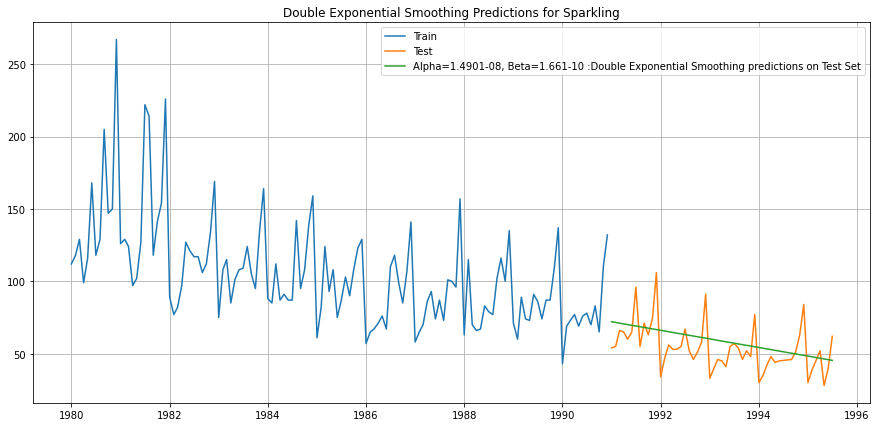

In [172]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(DES_train_r, label='Train')
plt.plot(DES_test_r, label='Test')

plt.plot(DES_predict_r, label='Alpha=1.4901-08, Beta=1.661-10 :Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Double Exponential Smoothing Predictions for Sparkling');

In [173]:
print('DES RMSE:',mean_squared_error(DES_test_r.values,DES_predict_r.values,squared=False))

DES RMSE: 15.268943764436564


In [174]:
temp_resultsDf = pd.DataFrame({'Test RMSE-Rose': [mean_squared_error(DES_test_r.values,DES_predict_r.values,squared=False)]}
                              ,index=['Alpha=1.4901-08,,Beta=1.661-10:Double Exponential Smoothing'])

resultsDf_r = pd.concat([resultsDf_r, temp_resultsDf])
resultsDf_r

Test RMSE-Rose
Linear Regression                                        15.268955
Naive Approach                                           79.718773
Simple Average                                           53.460570
2point Trailing Moving Average                           11.529278
4point Trailing Moving Average                           14.451403
6point Trailing Moving Average                           14.566327
9point Trailing Moving Average                           14.727630
Alpha= 0.098:Simple Exponential Smoothing                36.796227
Alpha=0.07:Tuned Simple Exponential Smoothing            36.435772
Alpha=1.4901-08,,Beta=1.661-10:Double Exponenti...       15.268944

In [175]:
#tuning dble exp smoothing - rose
resultsDf_blank = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_blank

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [176]:
model_DES_r = Holt(DES_train_r['Rose'])
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES_r.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train_r['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test_r['predict',i,j] = model_DES_alpha_i_j.forecast(steps=1000)
        
        rmse_model2_train = metrics.mean_squared_error(DES_train_r['Rose'],DES_train_r['predict',i,j],squared=False)
        
        rmse_model2_test = metrics.mean_squared_error(DES_test_r['Rose'],DES_test_r['predict',i,j],squared=False)
        
        resultsDf_blank = resultsDf_blank.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model2_train
                                          ,'Test RMSE':rmse_model2_test}, ignore_index=True)

C:\Users\Soundarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Soundarya\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [177]:
resultsDf_blank.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Train RMSE  Test RMSE
0            0.1          0.1   34.439111  36.923416
1            0.1          0.2   33.450729  48.688648
10           0.2          0.1   33.097427  65.731702
2            0.1          0.3   33.145789  78.156641
20           0.3          0.1   33.611269  98.653317

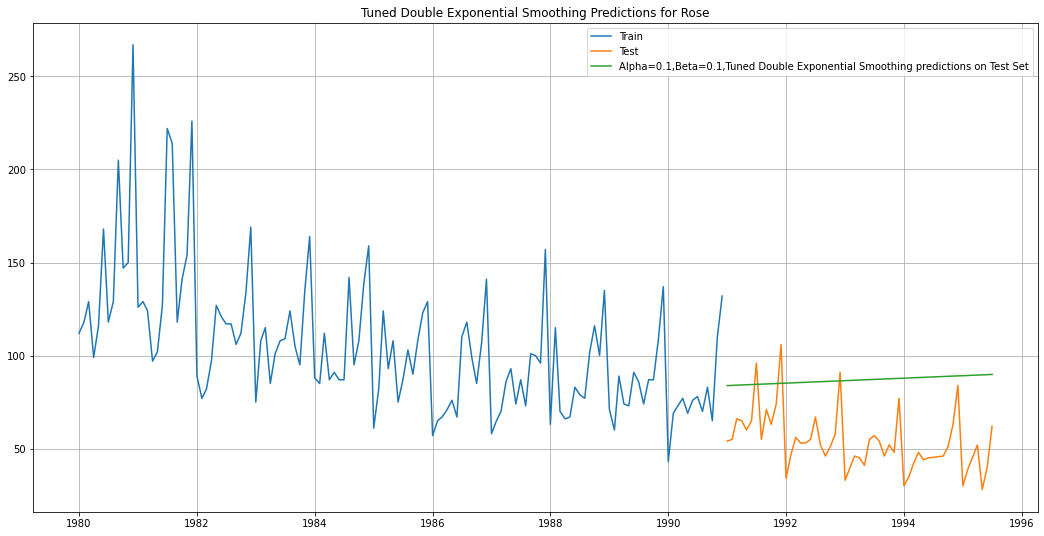

In [178]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train_r['Rose'], label='Train')
plt.plot(DES_test_r['Rose'], label='Test')

plt.plot(DES_test_r['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,Tuned Double Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid()
plt.title('Tuned Double Exponential Smoothing Predictions for Rose');

In [179]:
temp_resultsDf = pd.DataFrame({'Test RMSE-Rose':[resultsDf_blank.sort_values(by=['Test RMSE']).values[0][3]]}
                              ,index=['Alpha=0.1,,Beta=0.1:Tuned Double Exponential Smoothing'])

resultsDf_r = pd.concat([resultsDf_r, temp_resultsDf])
resultsDf_r

Test RMSE-Rose
Linear Regression                                        15.268955
Naive Approach                                           79.718773
Simple Average                                           53.460570
2point Trailing Moving Average                           11.529278
4point Trailing Moving Average                           14.451403
6point Trailing Moving Average                           14.566327
9point Trailing Moving Average                           14.727630
Alpha= 0.098:Simple Exponential Smoothing                36.796227
Alpha=0.07:Tuned Simple Exponential Smoothing            36.435772
Alpha=1.4901-08,,Beta=1.661-10:Double Exponenti...       15.268944
Alpha=0.1,,Beta=0.1:Tuned Double Exponential Sm...       36.923416

In [180]:
#triple exp smoothing - sparkle
TES_train_s = train_sparkle.copy()
TES_test_s = test_sparkle.copy()

In [181]:
model_TES_s = ExponentialSmoothing(TES_train_s['Sparkling'],trend='multiplicative',seasonal='multiplicative',
                                   initialization_method='estimated')

C:\Users\Soundarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [183]:
model_TES_autofit_s= model_TES_s.fit()

In [184]:
model_TES_autofit_s.params

{'smoothing_level': 0.11106668752955826,
 'smoothing_trend': 0.04936072355729082,
 'smoothing_seasonal': 0.3621821387810734,
 'damping_trend': nan,
 'initial_level': 2360.4089797373545,
 'initial_trend': 0.9992288111047797,
 'initial_seasons': array([0.71936124, 0.6984697 , 0.90024844, 0.80991063, 0.66820986,
        0.66898271, 0.87875613, 1.11648842, 0.90067181, 1.17297733,
        1.82687893, 2.27815792]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [185]:
TES_test_s['auto_predict'] = model_TES_autofit_s.forecast(steps=len(TES_test_s))
TES_test_s.head()

Sparkling  auto_predict
YearMonth                          
1991-01-01       1902   1591.299973
1991-02-01       2049   1360.408886
1991-03-01       1874   1767.949510
1991-04-01       1279   1661.619432
1991-05-01       1432   1547.414170

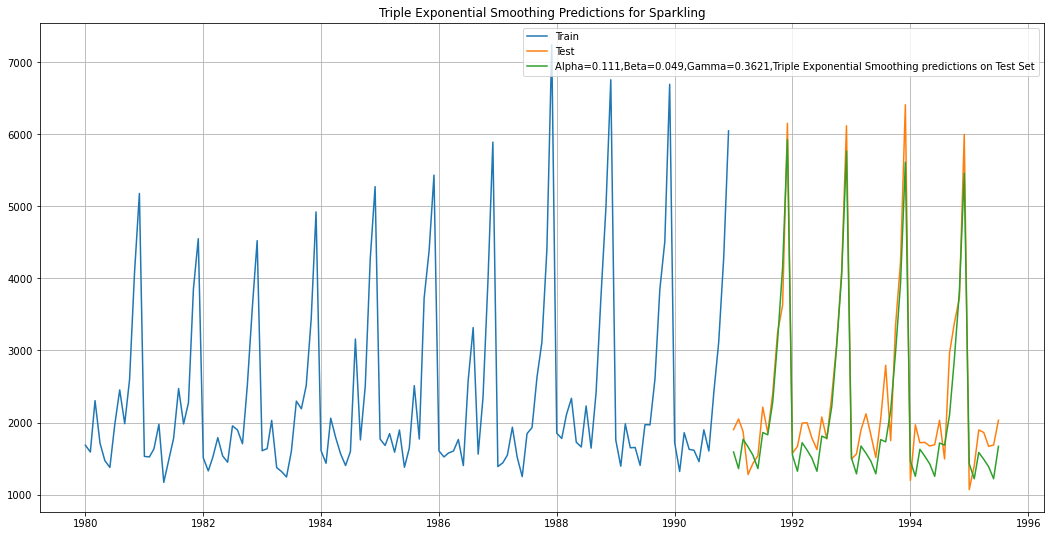

In [186]:
plt.figure(figsize=(18,9))
plt.plot(TES_train_s['Sparkling'], label='Train')
plt.plot(TES_test_s['Sparkling'], label='Test')

plt.plot(TES_test_s['auto_predict'] , label='Alpha=0.111,Beta=0.049,Gamma=0.3621,Triple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Predictions for Sparkling');

In [187]:
print('TES RMSE:',mean_squared_error(TES_test_s['Sparkling'],TES_test_s['auto_predict'].values,squared=False))

TES RMSE: 380.3984781419219


In [188]:
resultsDf_temp = pd.DataFrame({'Test RMSE-Sparkling': [mean_squared_error(TES_test_s['Sparkling'],TES_test_s['auto_predict'].values,squared=False)]}
                           ,index=['Alpha=0.111,Beta=0.049,Gamma=0.362:Triple Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE-Sparkling
Linear Regression                                           1389.135175
Naive Approach                                              3864.279352
Simple Average                                              1275.081804
2point Trailing Moving Average                               813.400684
4point Trailing Moving Average                              1156.589694
6point Trailing Moving Average                              1283.927428
9point Trailing Moving Average                              1346.278315
Alpha=0.049:Simple Exponential Smoothing                    1316.035487
Alpha=0.02:Tuned Simple Exponential Smoothing               1279.495201
Alpha=0.66,Beta=0.0001:DoubleExponentialSmoothing           5291.879833
Alpha=0.1,Beta=0.1:Tuned Double Exponential Smo...          1778.564670
Alpha=0.111,Beta=0.049,Gamma=0.362:Triple Expon...           380.398478

In [189]:
## First we will define an empty dataframe to store our values from the loop(tuning)

resultsDf_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [190]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_s.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train_s['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test_s['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(TES_test_s))
        
            rmse_model_train = metrics.mean_squared_error(TES_train_s['Sparkling'],TES_train_s['predict',i,j,k],squared=False)
            
            rmse_model_test = metrics.mean_squared_error(TES_test_s['Sparkling'],TES_test_s['predict',i,j,k],squared=False)
            
            resultsDf_2 = resultsDf_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model_train,'Test RMSE':rmse_model_test}
                                                 , ignore_index=True)

C:\Users\Soundarya\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:256: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
C:\Users\Soundarya\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:256: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
C:\Users\Soundarya\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:256: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
C:\Users\Soundarya\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:256: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
C:\Users\Soundarya\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:256: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
C:\Users\Soundarya\anaconda3\lib\site-package

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [191]:
resultsDf_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE   Test RMSE
302           0.4          0.1           0.3  381.106645  326.579641
201           0.3          0.1           0.2  375.956510  342.464413
110           0.2          0.2           0.1  395.987244  345.931571
131           0.2          0.4           0.2  401.704682  349.425739
222           0.3          0.3           0.3  396.692796  353.602587

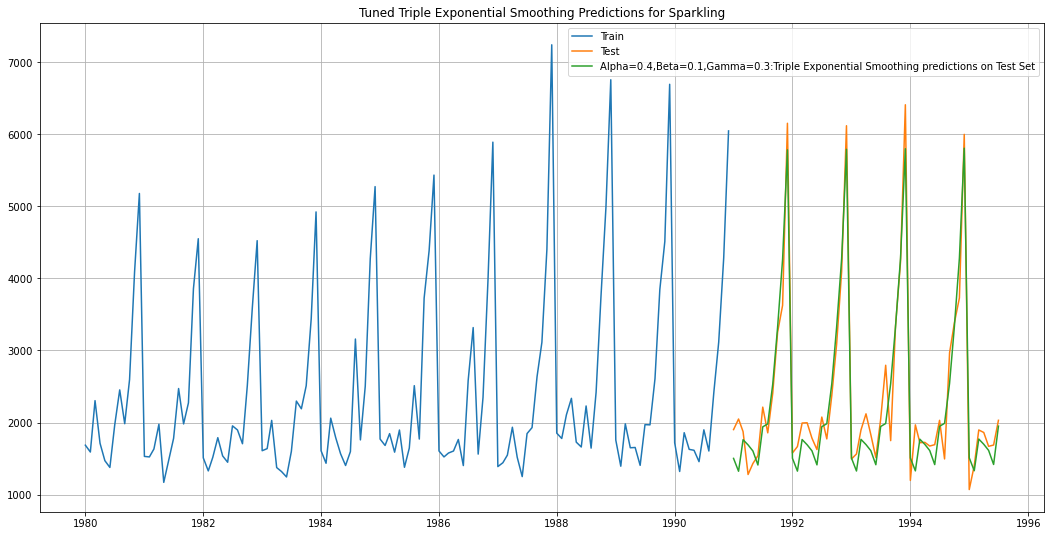

In [192]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train_s['Sparkling'], label='Train')
plt.plot(TES_test_s['Sparkling'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test_s['predict', 0.40000000000000004,0.10000000000000001,0.30000000000000003],
         label='Alpha=0.4,Beta=0.1,Gamma=0.3:Triple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();
plt.title('Tuned Triple Exponential Smoothing Predictions for Sparkling');

In [193]:
resultsDf_temp = pd.DataFrame({'Test RMSE-Sparkling': [resultsDf_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.4,Beta=0.01,Gamma=0.3:Tuned Triple Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE-Sparkling
Linear Regression                                           1389.135175
Naive Approach                                              3864.279352
Simple Average                                              1275.081804
2point Trailing Moving Average                               813.400684
4point Trailing Moving Average                              1156.589694
6point Trailing Moving Average                              1283.927428
9point Trailing Moving Average                              1346.278315
Alpha=0.049:Simple Exponential Smoothing                    1316.035487
Alpha=0.02:Tuned Simple Exponential Smoothing               1279.495201
Alpha=0.66,Beta=0.0001:DoubleExponentialSmoothing           5291.879833
Alpha=0.1,Beta=0.1:Tuned Double Exponential Smo...          1778.564670
Alpha=0.111,Beta=0.049,Gamma=0.362:Triple Expon...           380.398478
Alpha=0.4,Beta=0.01,Gamma=0.3:Tuned Triple Expo...           326.579641

In [195]:
# tes-rose
TES_train_r = train_rose.copy()
TES_test_r = test_rose.copy()

In [196]:
# Initializing the Triple Exponential Smoothing Model
model_TES_r = ExponentialSmoothing(TES_train_r['Rose'],trend='multiplicative',seasonal='multiplicative',
                                   initialization_method='estimated')

C:\Users\Soundarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [197]:
model_TES_autofit_r= model_TES_r.fit()

C:\Users\Soundarya\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [198]:
model_TES_autofit_r.params

{'smoothing_level': 0.05509258651447915,
 'smoothing_trend': 0.03163443011388579,
 'smoothing_seasonal': 0.00033441920536960617,
 'damping_trend': nan,
 'initial_level': 162.24448448772696,
 'initial_trend': 0.9924159109944972,
 'initial_seasons': array([0.69939026, 0.79380649, 0.86893412, 0.75865299, 0.85377453,
        0.9282575 , 1.02003364, 1.08767274, 1.03068915, 1.00761385,
        1.17626069, 1.61916255]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [199]:
## Prediction on the test data

TES_test_r['auto_predict'] = model_TES_autofit_r.forecast(steps=len(TES_test_r))
TES_test_r.head()

Rose  auto_predict
YearMonth                     
1991-01-01  54.0     55.663816
1991-02-01  55.0     62.993228
1991-03-01  66.0     68.738503
1991-04-01  65.0     59.835212
1991-05-01  60.0     67.118704

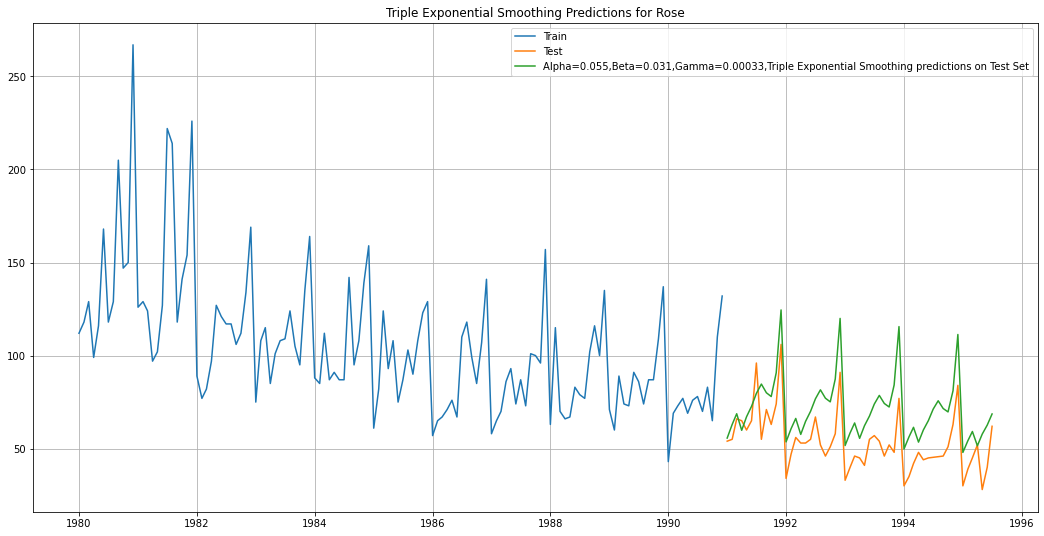

In [200]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train_r['Rose'], label='Train')
plt.plot(TES_test_r['Rose'], label='Test')

plt.plot(TES_test_r['auto_predict'] , label='Alpha=0.055,Beta=0.031,Gamma=0.00033,Triple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Predictions for Rose');

In [201]:
print('TES RMSE:',mean_squared_error(TES_test_r['Rose'],TES_test_r['auto_predict'].values,squared=False))

TES RMSE: 19.98744868511025


In [202]:
temp_resultsDf = pd.DataFrame({'Test RMSE-Rose':[mean_squared_error(TES_test_r['Rose'],TES_test_r['auto_predict'].values,squared=False)]}
                              ,index=['Alpha=0.055,Beta=0.031,Gamma=0.00033:Triple Exponential Smoothing'])

resultsDf_r = pd.concat([resultsDf_r, temp_resultsDf])
resultsDf_r

Test RMSE-Rose
Linear Regression                                        15.268955
Naive Approach                                           79.718773
Simple Average                                           53.460570
2point Trailing Moving Average                           11.529278
4point Trailing Moving Average                           14.451403
6point Trailing Moving Average                           14.566327
9point Trailing Moving Average                           14.727630
Alpha= 0.098:Simple Exponential Smoothing                36.796227
Alpha=0.07:Tuned Simple Exponential Smoothing            36.435772
Alpha=1.4901-08,,Beta=1.661-10:Double Exponenti...       15.268944
Alpha=0.1,,Beta=0.1:Tuned Double Exponential Sm...       36.923416
Alpha=0.055,Beta=0.031,Gamma=0.00033:Triple Exp...       19.987449

In [203]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_3 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_3

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [204]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_r.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train_r['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test_r['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(TES_test_r))
        
            rmse_model_train = metrics.mean_squared_error(TES_train_r['Rose'],TES_train_r['predict',i,j,k],squared=False)
            
            rmse_model_test = metrics.mean_squared_error(TES_test_r['Rose'],TES_test_r['predict',i,j,k],squared=False)
            
            resultsDf_3 = resultsDf_3.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model_train,'Test RMSE':rmse_model_test}
                                                 , ignore_index=True)

C:\Users\Soundarya\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:256: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
C:\Users\Soundarya\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:256: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
C:\Users\Soundarya\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:256: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
C:\Users\Soundarya\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:256: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
C:\Users\Soundarya\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1382: RuntimeWarning: overflow encountered in power
  b[nobs:] = dampen(b[nobs], phi_h)
C:\Users\Soundarya\anaconda3\lib\site-packages\statsmodels\tsa\h

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [205]:
resultsDf_3.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
161           0.2          0.7           0.2   24.042290   8.702460
215           0.3          0.2           0.6   26.940472  10.206702
10            0.1          0.2           0.1   19.647823  11.133402
11            0.1          0.2           0.2   20.172839  11.403697
12            0.1          0.2           0.3   20.828952  11.826158

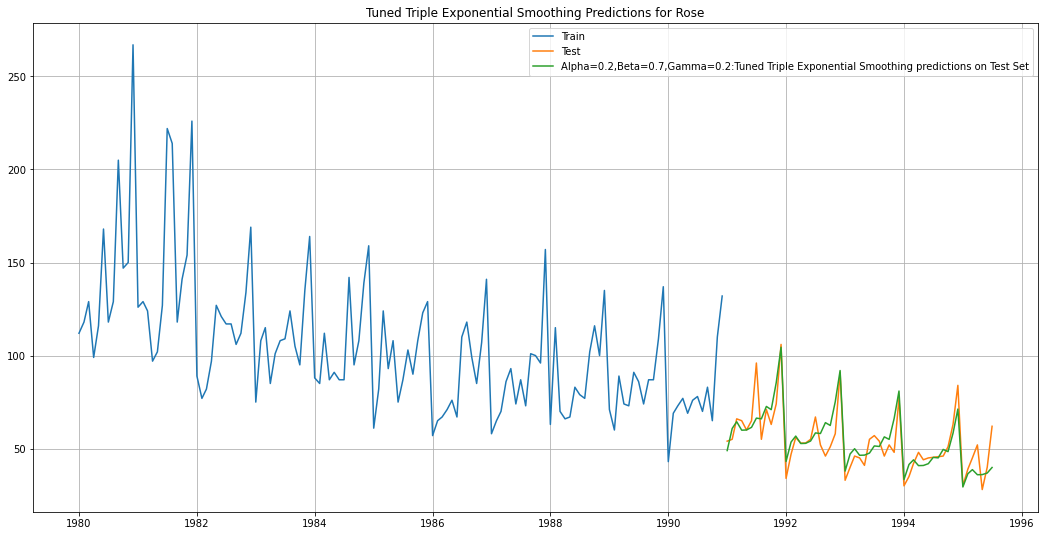

In [206]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train_r['Rose'], label='Train')
plt.plot(TES_test_r['Rose'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test_r['predict', 0.20000000000000002,0.70000000000000007,0.2],
         label='Alpha=0.2,Beta=0.7,Gamma=0.2:Tuned Triple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();
plt.title('Tuned Triple Exponential Smoothing Predictions for Rose');

In [207]:
temp_resultsDf = pd.DataFrame({'Test RMSE-Rose':[resultsDf_3.sort_values(by=['Test RMSE']).values[0][4]]}
                              ,index=['Alpha=0.2,Beta=0.7,Gamma=0.2:Tuned Triple Exponential Smoothing'])

resultsDf_r = pd.concat([resultsDf_r, temp_resultsDf])
resultsDf_r

Test RMSE-Rose
Linear Regression                                        15.268955
Naive Approach                                           79.718773
Simple Average                                           53.460570
2point Trailing Moving Average                           11.529278
4point Trailing Moving Average                           14.451403
6point Trailing Moving Average                           14.566327
9point Trailing Moving Average                           14.727630
Alpha= 0.098:Simple Exponential Smoothing                36.796227
Alpha=0.07:Tuned Simple Exponential Smoothing            36.435772
Alpha=1.4901-08,,Beta=1.661-10:Double Exponenti...       15.268944
Alpha=0.1,,Beta=0.1:Tuned Double Exponential Sm...       36.923416
Alpha=0.055,Beta=0.031,Gamma=0.00033:Triple Exp...       19.987449
Alpha=0.2,Beta=0.7,Gamma=0.2:Tuned Triple Expon...        8.702460

# 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

In [208]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

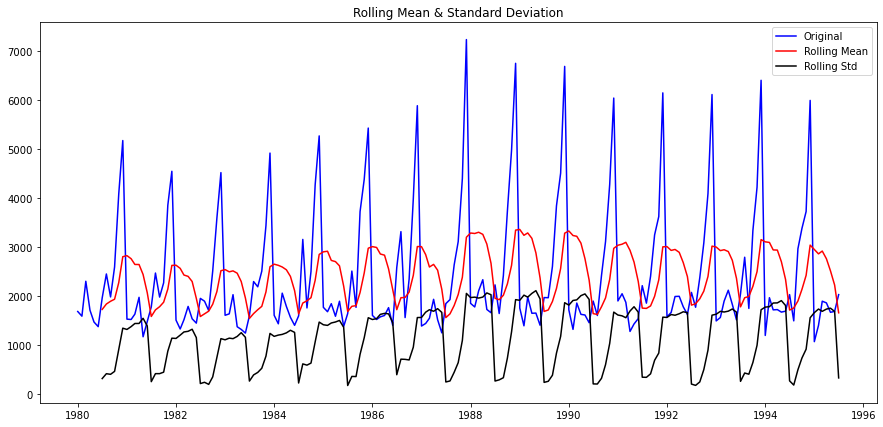

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [209]:
test_stationarity(sparkle['Sparkling'])

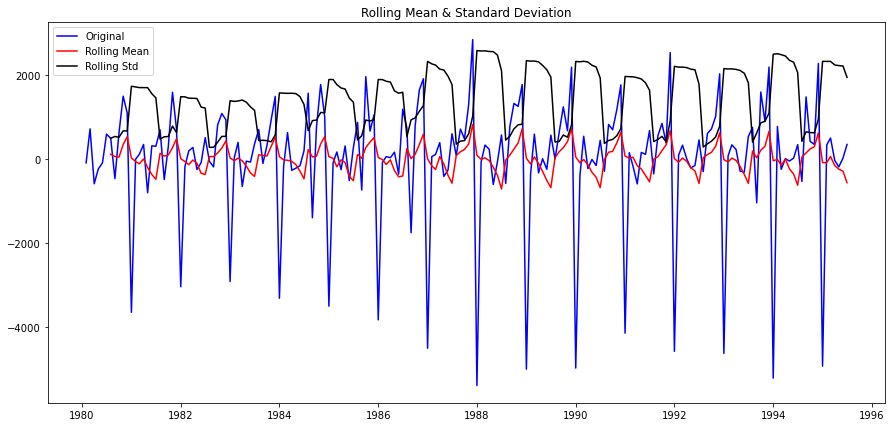

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [210]:
test_stationarity(sparkle['Sparkling'].diff().dropna())

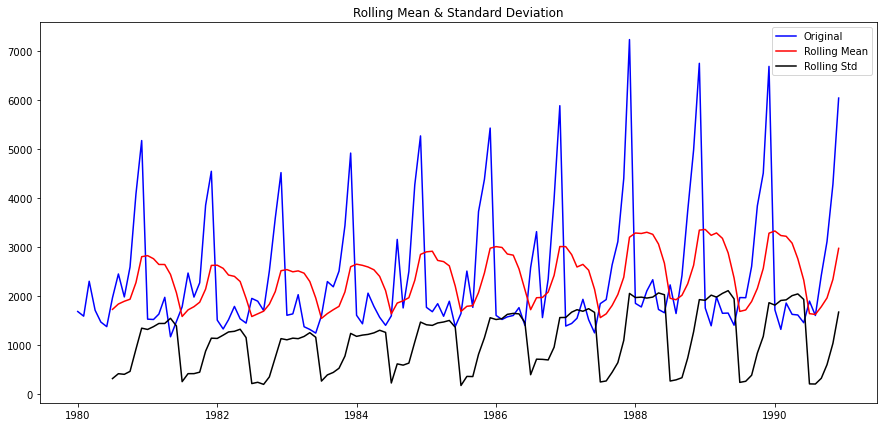

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [211]:
test_stationarity(train_sparkle['Sparkling'])

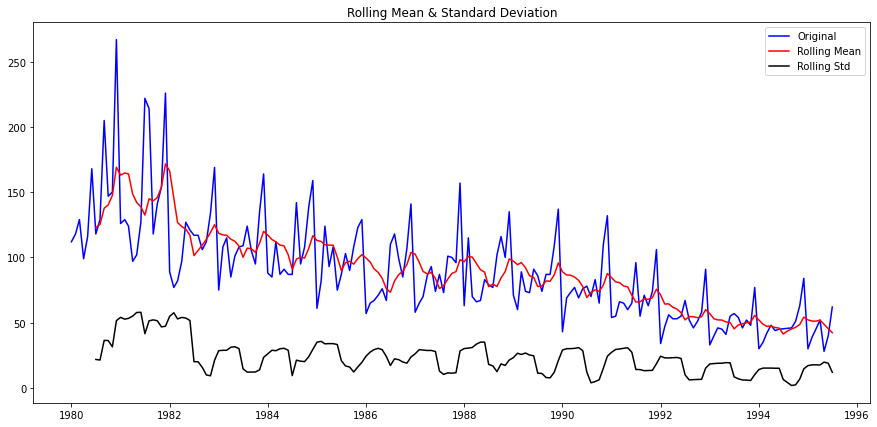

Results of Dickey-Fuller Test:
Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [212]:
test_stationarity(rose['Rose'])

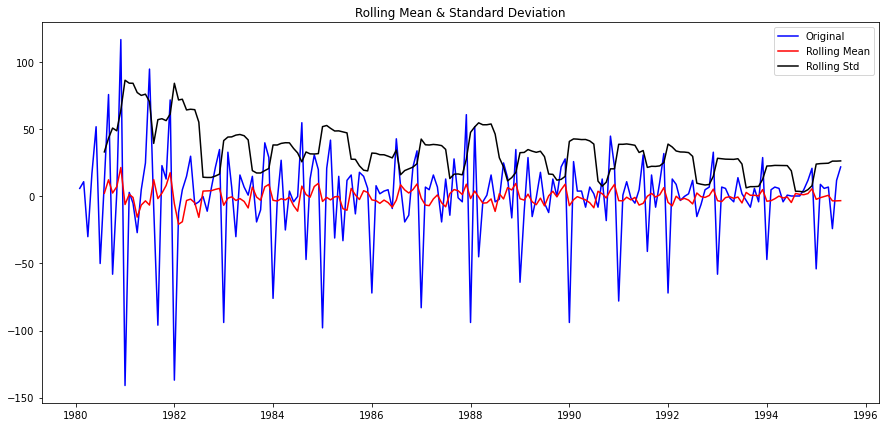

Results of Dickey-Fuller Test:
Test Statistic                -8.044392e+00
p-value                        1.810895e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [214]:
test_stationarity(rose['Rose'].diff().dropna())

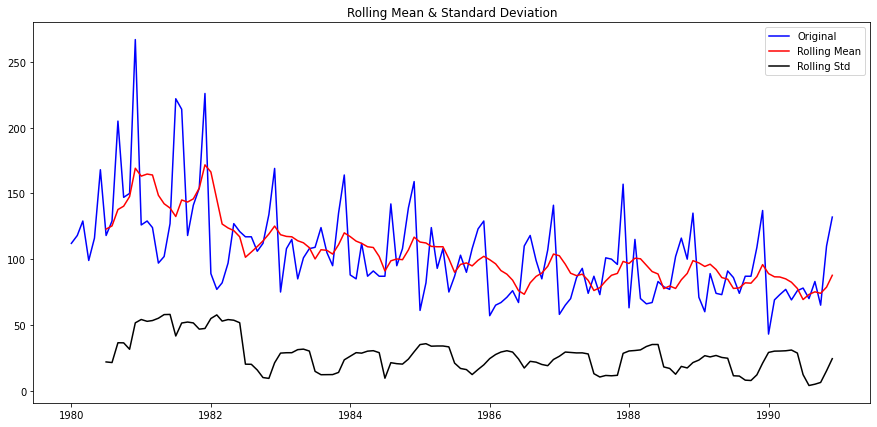

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [215]:
test_stationarity(train_rose['Rose'])

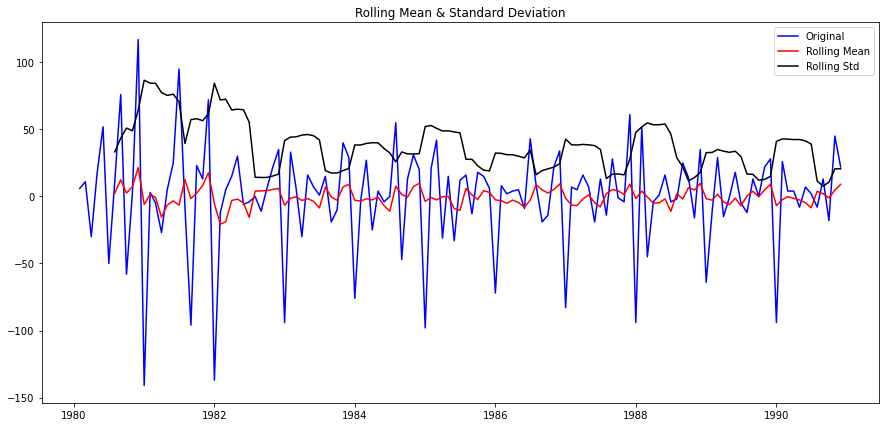

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [216]:
test_stationarity(train_rose['Rose'].diff().dropna())

# 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

In [217]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

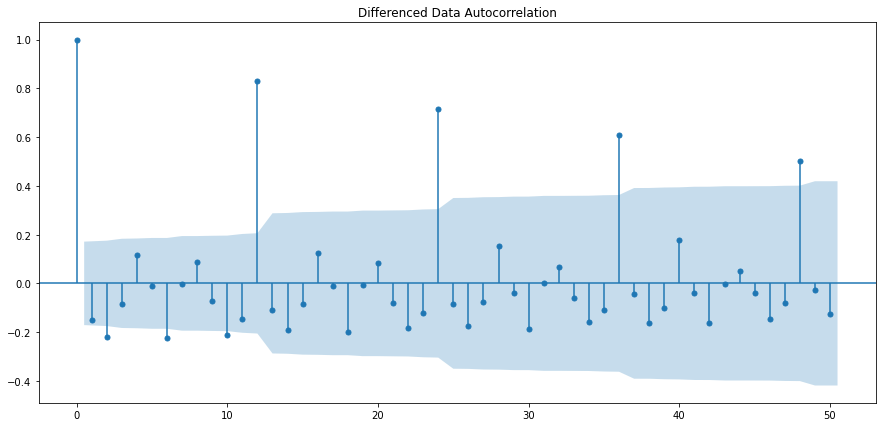

In [218]:
plot_acf(train_sparkle['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

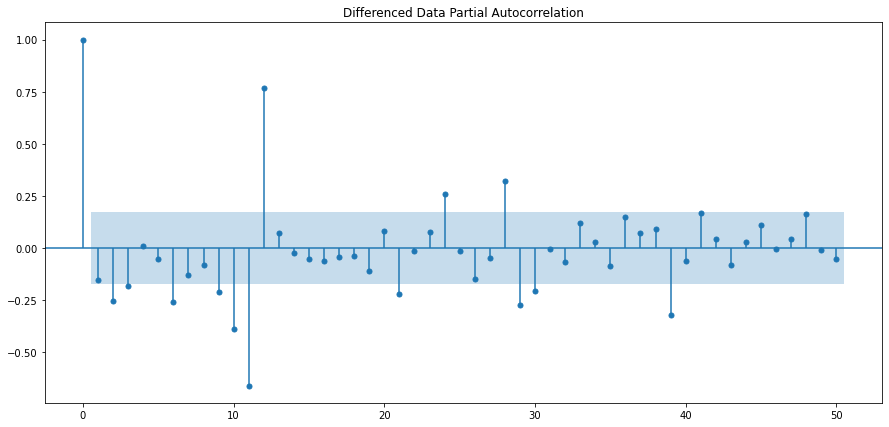

In [220]:
plot_pacf(train_sparkle['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [221]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [222]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [224]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train_rose['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748312
ARIMA(0, 1, 2) - AIC:1279.6715288535818
ARIMA(1, 1, 0) - AIC:1317.3503105381492
ARIMA(1, 1, 1) - AIC:1280.5742295380032
ARIMA(1, 1, 2) - AIC:1279.870723423191
ARIMA(2, 1, 0) - AIC:1298.6110341605004
ARIMA(2, 1, 1) - AIC:1281.5078621868474
ARIMA(2, 1, 2) - AIC:1281.8707222264284


In [225]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
2  (0, 1, 2)  1279.671529
5  (1, 1, 2)  1279.870723
4  (1, 1, 1)  1280.574230
7  (2, 1, 1)  1281.507862
8  (2, 1, 2)  1281.870722
1  (0, 1, 1)  1282.309832
6  (2, 1, 0)  1298.611034
3  (1, 1, 0)  1317.350311
0  (0, 1, 0)  1333.154673

In [227]:
from statsmodels.tsa.arima.model import ARIMA

auto_ARIMA = ARIMA(train_rose['Rose'], order=(0,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -636.836
Date:                Fri, 20 May 2022   AIC                           1279.672
Time:                        11:34:54   BIC                           1288.297
Sample:                    01-01-1980   HQIC                          1283.176
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6970      0.072     -9.689      0.000      -0.838      -0.556
ma.L2         -0.2042      0.073     -2.794      0.005      -0.347      -0.061
sigma2       965.8407     88.305     10.938      0.0

C:\Users\Soundarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Soundarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Soundarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [229]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test_rose))

In [231]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test_rose['Rose'],predicted_auto_ARIMA.values,squared=False)
print(rmse)

37.30647971665308


In [232]:
temp_resultsDf = pd.DataFrame({'Test RMSE-Rose': 15.619203}
                                          ,index=['ARIMA(0,1,2) AIC criteria'])

resultsDf_r = pd.concat([resultsDf_r, temp_resultsDf])
resultsDf_r

Test RMSE-Rose
Linear Regression                                        15.268955
Naive Approach                                           79.718773
Simple Average                                           53.460570
2point Trailing Moving Average                           11.529278
4point Trailing Moving Average                           14.451403
6point Trailing Moving Average                           14.566327
9point Trailing Moving Average                           14.727630
Alpha= 0.098:Simple Exponential Smoothing                36.796227
Alpha=0.07:Tuned Simple Exponential Smoothing            36.435772
Alpha=1.4901-08,,Beta=1.661-10:Double Exponenti...       15.268944
Alpha=0.1,,Beta=0.1:Tuned Double Exponential Sm...       36.923416
Alpha=0.055,Beta=0.031,Gamma=0.00033:Triple Exp...       19.987449
Alpha=0.2,Beta=0.7,Gamma=0.2:Tuned Triple Expon...        8.702460
ARIMA(0,1,2) AIC criteria                                15.619203

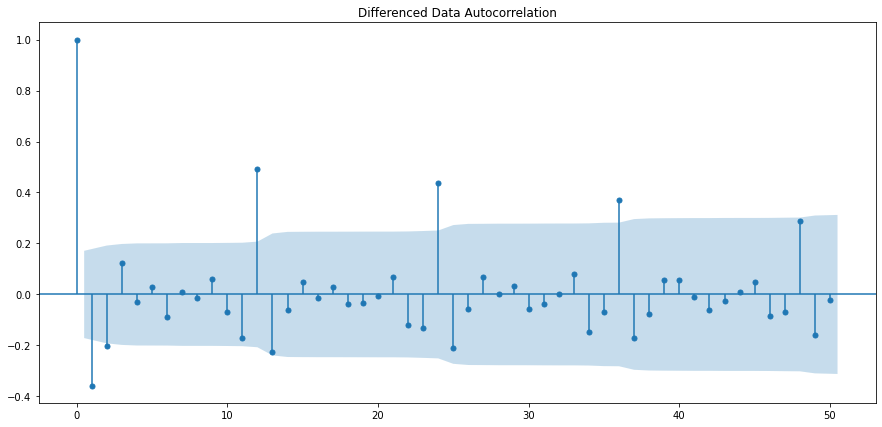

In [234]:
plot_acf(train_rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

In [235]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [236]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [238]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train_rose['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.423082720733
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380911
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869386036
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635753504
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041


C:\Users\Soundarya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697521
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.573540894562
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383964
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918337
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383859
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.793632491795
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.743433094527
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483302789
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866536075
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461672
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988271349375
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:1251.6675430541054
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1083.486697526487
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:913.4938486617702
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1088.8332843413825
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1045.5400933538035
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:904.8310913587571
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:913.0105912257991
SARIMA(0, 1, 2)x(2, 0, 1

In [239]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal         AIC
26  (0, 1, 2)  (2, 0, 2, 12)  887.937509
53  (1, 1, 2)  (2, 0, 2, 12)  889.903048
80  (2, 1, 2)  (2, 0, 2, 12)  890.668798
69  (2, 1, 1)  (2, 0, 0, 12)  896.518161
78  (2, 1, 2)  (2, 0, 0, 12)  897.346444

In [241]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train_rose['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.969
Date:                            Fri, 20 May 2022   AIC                            887.938
Time:                                    11:37:31   BIC                            906.448
Sample:                                         0   HQIC                           895.437
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8427    189.943     -0.004      0.996    -373.124     371.439
ma.L2         -0.1573     29.841   

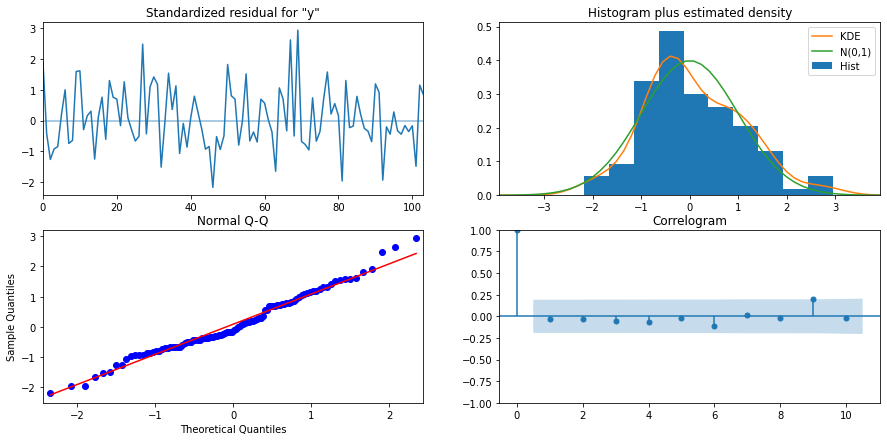

In [242]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

In [243]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test_rose))

In [244]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  62.867265  15.928501      31.647977      94.086553
1  70.541190  16.147659      38.892360     102.190020
2  77.356411  16.147657      45.707586     109.005236
3  76.208814  16.147657      44.559989     107.857639
4  72.747398  16.147657      41.098573     104.396223

In [247]:
rmse = mean_squared_error(test_rose['Rose'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

26.928362030237995


In [248]:
temp_resultsDf = pd.DataFrame({'Test RMSE-Rose': [rmse]}
                                          ,index=['SARIMA(0,1,2)(2,0,2,12) AIC criteria'])

resultsDf_r = pd.concat([resultsDf_r, temp_resultsDf])
resultsDf_r

Test RMSE-Rose
Linear Regression                                        15.268955
Naive Approach                                           79.718773
Simple Average                                           53.460570
2point Trailing Moving Average                           11.529278
4point Trailing Moving Average                           14.451403
6point Trailing Moving Average                           14.566327
9point Trailing Moving Average                           14.727630
Alpha= 0.098:Simple Exponential Smoothing                36.796227
Alpha=0.07:Tuned Simple Exponential Smoothing            36.435772
Alpha=1.4901-08,,Beta=1.661-10:Double Exponenti...       15.268944
Alpha=0.1,,Beta=0.1:Tuned Double Exponential Sm...       36.923416
Alpha=0.055,Beta=0.031,Gamma=0.00033:Triple Exp...       19.987449
Alpha=0.2,Beta=0.7,Gamma=0.2:Tuned Triple Expon...        8.702460
ARIMA(0,1,2) AIC criteria                                15.619203
SARIMA(0,1,2)(2,0,2,12) AIC criteria                     26.928362

# 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

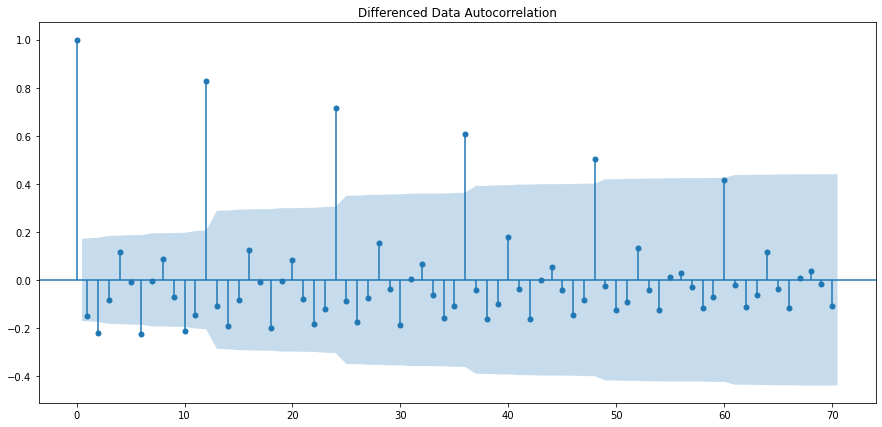

In [249]:
plot_acf(train_sparkle['Sparkling'].diff().dropna(),lags=70,title='Differenced Data Autocorrelation')
plt.show()

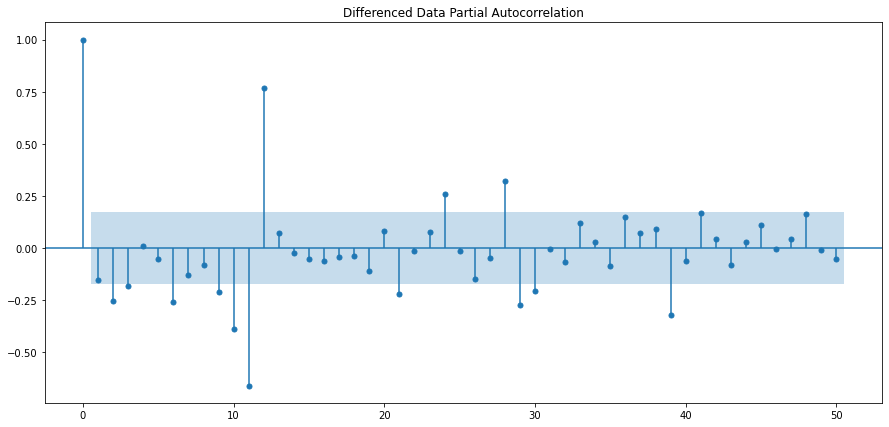

In [250]:
plot_pacf(train_sparkle['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show();

In [252]:
manual_ARIMA = ARIMA(train_sparkle['Sparkling'].astype('float64'), order=(0,1,0))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1132.832
Date:                Fri, 20 May 2022   AIC                           2267.663
Time:                        14:30:04   BIC                           2270.538
Sample:                    01-01-1980   HQIC                          2268.831
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.885e+06   1.29e+05     14.658      0.000    1.63e+06    2.14e+06
Ljung-Box (L1) (Q):                   3.07   Jarque-Bera (JB):               198.83
Prob(Q):                              0.08   Pr

C:\Users\Soundarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Soundarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Soundarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [254]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test_sparkle))

In [256]:
rmse = mean_squared_error(test_sparkle['Sparkling'],predicted_manual_ARIMA.values,squared=False)
print(rmse)

3864.2793518443914


In [257]:
resultsDf_temp = pd.DataFrame({'Test RMSE-Sparkling':  [rmse]}
                                          ,index=['ARIMA(0,1,0) Manual plot'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE-Sparkling
Linear Regression                                           1389.135175
Naive Approach                                              3864.279352
Simple Average                                              1275.081804
2point Trailing Moving Average                               813.400684
4point Trailing Moving Average                              1156.589694
6point Trailing Moving Average                              1283.927428
9point Trailing Moving Average                              1346.278315
Alpha=0.049:Simple Exponential Smoothing                    1316.035487
Alpha=0.02:Tuned Simple Exponential Smoothing               1279.495201
Alpha=0.66,Beta=0.0001:DoubleExponentialSmoothing           5291.879833
Alpha=0.1,Beta=0.1:Tuned Double Exponential Smo...          1778.564670
Alpha=0.111,Beta=0.049,Gamma=0.362:Triple Expon...           380.398478
Alpha=0.4,Beta=0.01,Gamma=0.3:Tuned Triple Expo...           326.579641
ARIMA(0,1,0) Manual plot                                    3864.279352

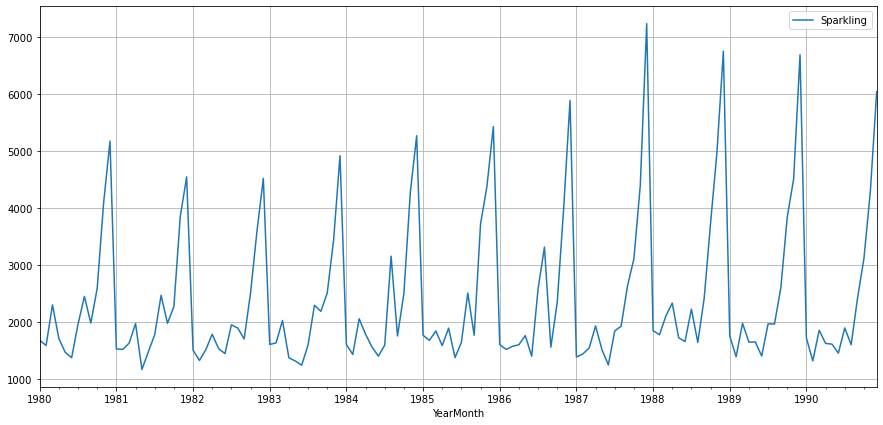

In [259]:
train_sparkle.plot()
plt.grid();#sarima model - sparkle

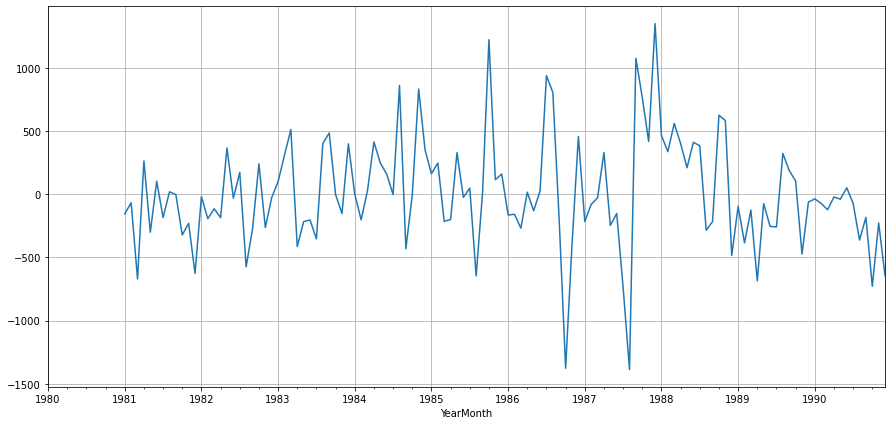

In [260]:
(train_sparkle['Sparkling'].diff(12)).plot()
plt.grid();

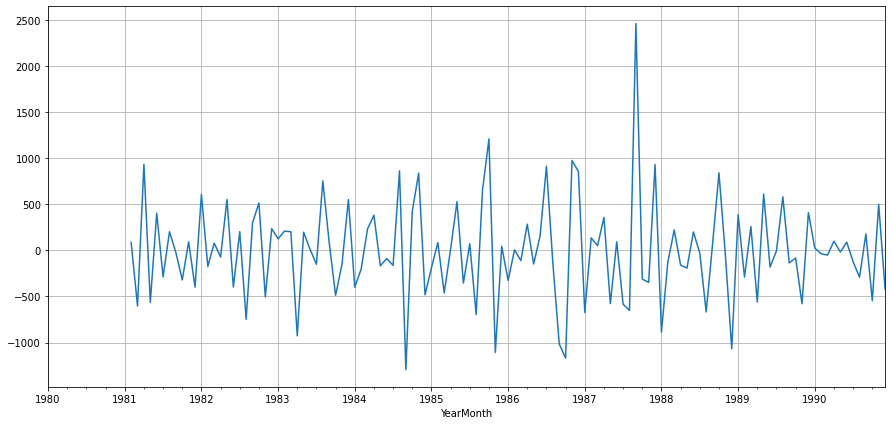

In [261]:
(train_sparkle['Sparkling'].diff(12)).diff().plot()
plt.grid();

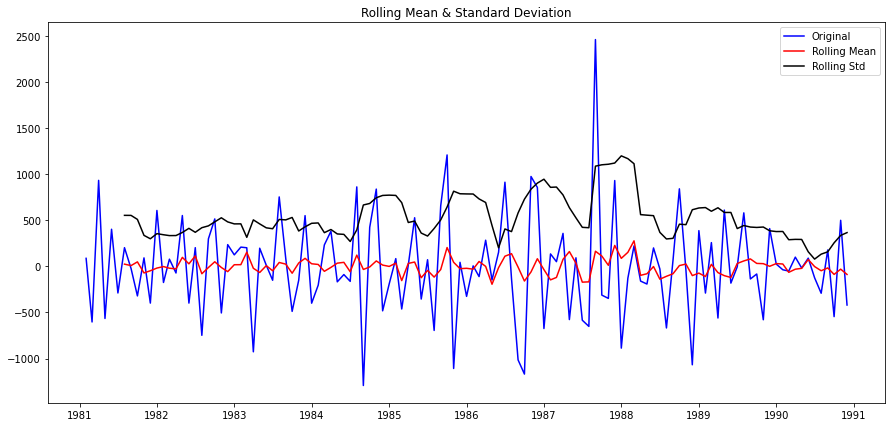

Results of Dickey-Fuller Test:
Test Statistic                  -3.342905
p-value                          0.013066
#Lags Used                      10.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [263]:
test_stationarity((train_sparkle['Sparkling'].diff(12).dropna()).diff().dropna())

In [265]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train_sparkle['Sparkling'].values,
                                order=(0, 1, 0),
                                seasonal_order=(2, 1, 4, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

C:\Users\Soundarya\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                           SARIMAX Results                                           
Dep. Variable:                                             y   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(2, 1, [1, 2, 3, 4], 12)   Log Likelihood                -538.663
Date:                                       Fri, 20 May 2022   AIC                           1091.326
Time:                                               14:32:27   BIC                           1107.066
Sample:                                                    0   HQIC                          1097.578
                                                       - 132                                         
Covariance Type:                                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.5734     

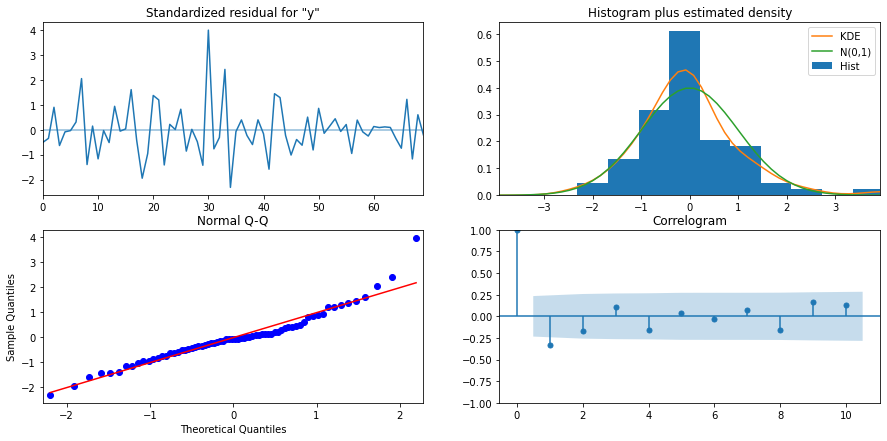

In [266]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

In [268]:
predicted_manual_SARIMA= results_manual_SARIMA.get_forecast(steps=len(test_sparkle))

In [269]:
predicted_manual_SARIMA.summary_frame(alpha=0.05).head()

y         mean      mean_se  mean_ci_lower  mean_ci_upper
0  1258.379360   501.571361     275.317557    2241.441163
1   890.013778   709.162809    -499.919787    2279.947344
2  1352.591554   868.475647    -349.589437    3054.772544
3  1241.696847  1002.790113    -723.735658    3207.129352
4  1232.913127  1121.127143    -964.455694    3430.281949

In [271]:
rmse = mean_squared_error(test_sparkle['Sparkling'],predicted_manual_SARIMA.predicted_mean,squared=False)
print(rmse)

937.5401314731712


In [272]:
resultsDf_temp = pd.DataFrame({'Test RMSE-Sparkling':  [rmse]}
                                          ,index=['SARIMA(0,1,0)(2,1,4,12) Manual plot'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE-Sparkling
Linear Regression                                           1389.135175
Naive Approach                                              3864.279352
Simple Average                                              1275.081804
2point Trailing Moving Average                               813.400684
4point Trailing Moving Average                              1156.589694
6point Trailing Moving Average                              1283.927428
9point Trailing Moving Average                              1346.278315
Alpha=0.049:Simple Exponential Smoothing                    1316.035487
Alpha=0.02:Tuned Simple Exponential Smoothing               1279.495201
Alpha=0.66,Beta=0.0001:DoubleExponentialSmoothing           5291.879833
Alpha=0.1,Beta=0.1:Tuned Double Exponential Smo...          1778.564670
Alpha=0.111,Beta=0.049,Gamma=0.362:Triple Expon...           380.398478
Alpha=0.4,Beta=0.01,Gamma=0.3:Tuned Triple Expo...           326.579641
ARIMA(0,1,0) Manual plot                                    3864.279352
SARIMA(0,1,0)(2,1,4,12) Manual plot                          937.540131

In [273]:
#Manual arima model - rose

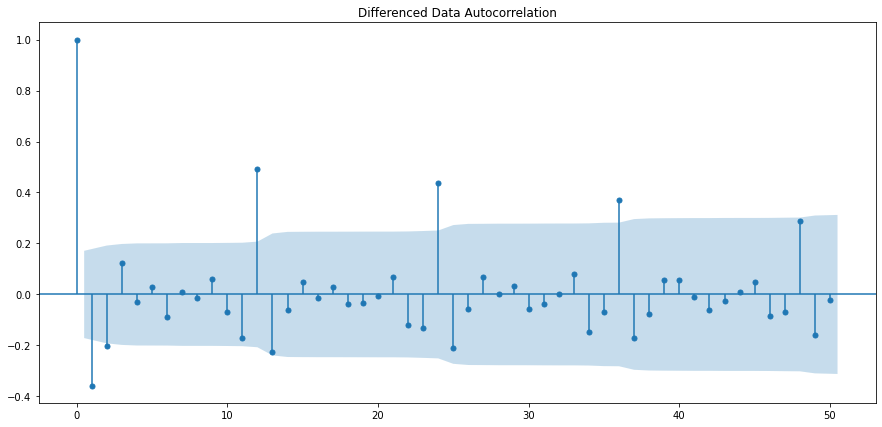

In [275]:
plot_acf(train_rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

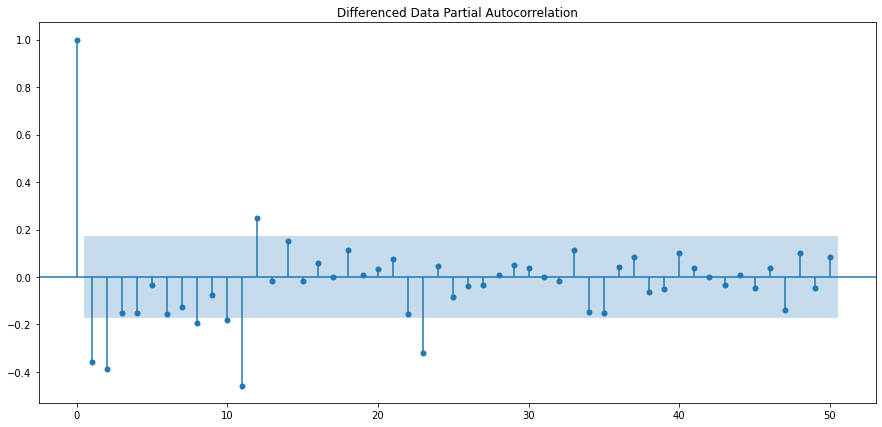

In [276]:
plot_pacf(train_rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show();

In [278]:
manual_ARIMA = ARIMA(train_rose['Rose'].astype('float64'), order=(2,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -635.935
Date:                Fri, 20 May 2022   AIC                           1281.871
Time:                        14:34:56   BIC                           1296.247
Sample:                    01-01-1980   HQIC                          1287.712
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4540      0.469     -0.969      0.333      -1.372       0.464
ar.L2          0.0001      0.170      0.001      0.999      -0.334       0.334
ma.L1         -0.2541      0.459     -0.554      0.5

C:\Users\Soundarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Soundarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Soundarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [279]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test_rose))

In [280]:
rmse = mean_squared_error(test_rose['Rose'],predicted_manual_ARIMA.values,squared=False)
print(rmse)

36.871196622260655


In [281]:
temp_resultsDf = pd.DataFrame({'Test RMSE-Rose': [rmse]}
                                          ,index=['ARIMA(2,1,2) Manual plot'])

resultsDf_r = pd.concat([resultsDf_r, temp_resultsDf])
resultsDf_r

Test RMSE-Rose
Linear Regression                                        15.268955
Naive Approach                                           79.718773
Simple Average                                           53.460570
2point Trailing Moving Average                           11.529278
4point Trailing Moving Average                           14.451403
6point Trailing Moving Average                           14.566327
9point Trailing Moving Average                           14.727630
Alpha= 0.098:Simple Exponential Smoothing                36.796227
Alpha=0.07:Tuned Simple Exponential Smoothing            36.435772
Alpha=1.4901-08,,Beta=1.661-10:Double Exponenti...       15.268944
Alpha=0.1,,Beta=0.1:Tuned Double Exponential Sm...       36.923416
Alpha=0.055,Beta=0.031,Gamma=0.00033:Triple Exp...       19.987449
Alpha=0.2,Beta=0.7,Gamma=0.2:Tuned Triple Expon...        8.702460
ARIMA(0,1,2) AIC criteria                                15.619203
SARIMA(0,1,2)(2,0,2,12) AIC criteria                     26.928362
ARIMA(2,1,2) Manual plot                                 36.871197

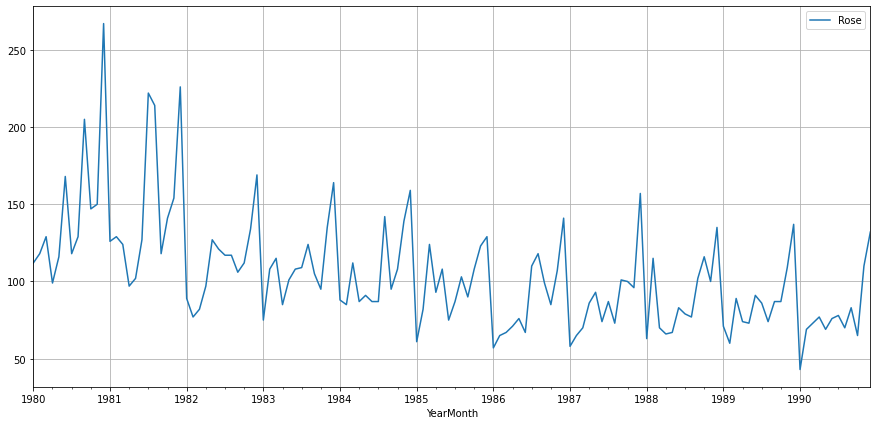

In [283]:
train_rose.plot()
plt.grid();

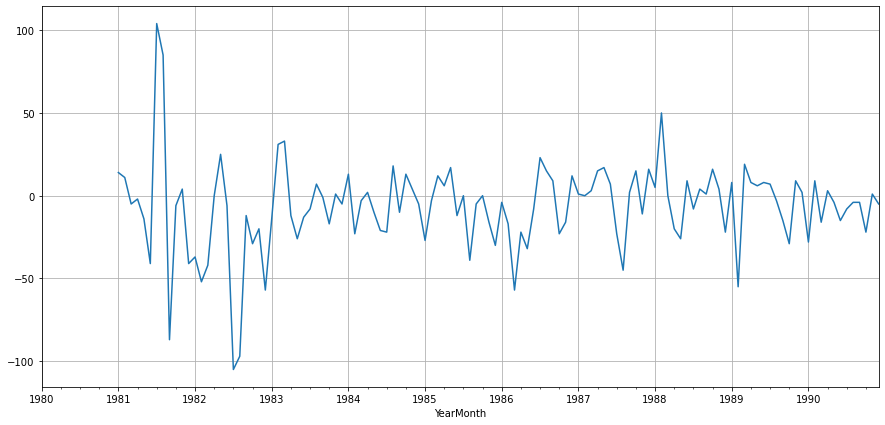

In [284]:
(train_rose['Rose'].diff(12)).plot()
plt.grid();

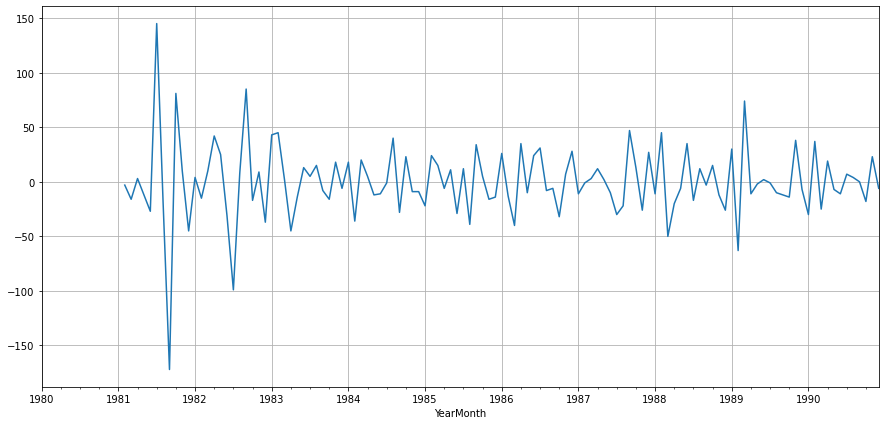

In [286]:
(train_rose['Rose'].diff(12)).diff().plot()
plt.grid();

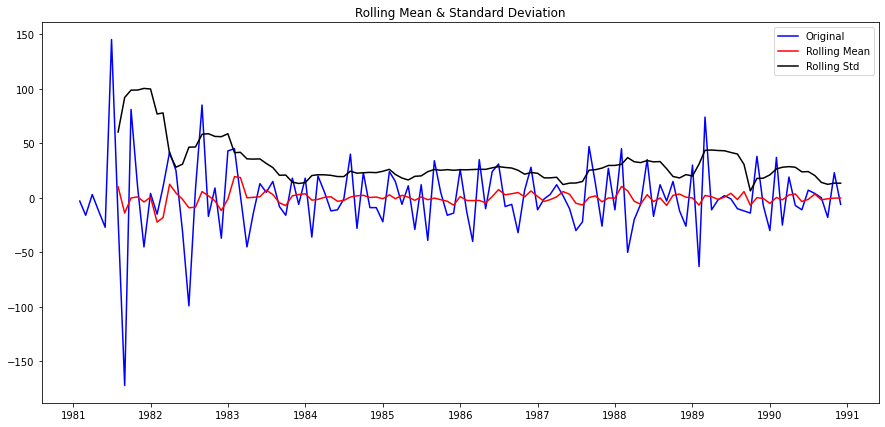

Results of Dickey-Fuller Test:
Test Statistic                  -3.692348
p-value                          0.004222
#Lags Used                      11.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64 



In [288]:
test_stationarity((train_rose['Rose'].diff(12).dropna()).diff().dropna())

In [289]:
import statsmodels.api as sm

manual_SARIMA_1 = sm.tsa.statespace.SARIMAX(train_rose['Rose'].values,
                                order=(2, 1, 2),
                                seasonal_order=(2, 1, 4, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_1 = manual_SARIMA_1.fit(maxiter=1000)
print(results_manual_SARIMA_1.summary())

C:\Users\Soundarya\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                           SARIMAX Results                                           
Dep. Variable:                                             y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 1, [1, 2, 3, 4], 12)   Log Likelihood                -276.118
Date:                                       Fri, 20 May 2022   AIC                            574.236
Time:                                               14:45:05   BIC                            598.651
Sample:                                                    0   HQIC                           583.910
                                                       - 132                                         
Covariance Type:                                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0068     

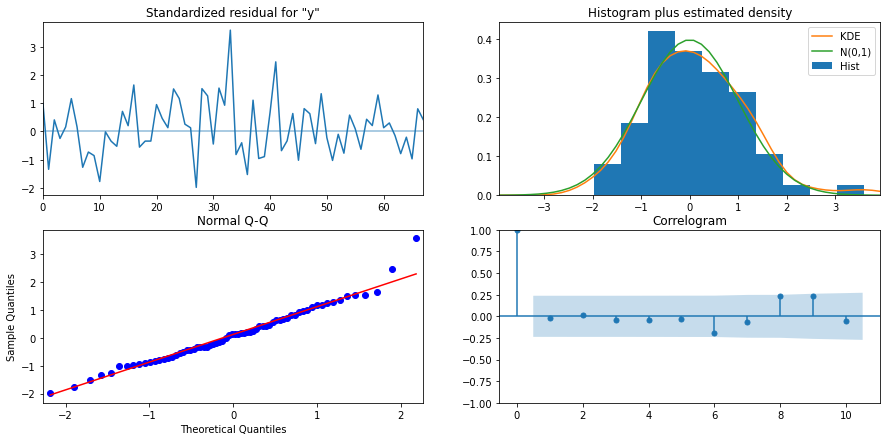

In [290]:
results_manual_SARIMA_1.plot_diagnostics()
plt.show()

In [292]:
predicted_manual_SARIMA_1= results_manual_SARIMA_1.get_forecast(steps=len(test_rose))

In [293]:
predicted_manual_SARIMA_1.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  45.359637  13.089497      19.704693      71.014580
1  58.633291  12.900133      33.349494      83.917088
2  72.015734  12.900802      46.730626      97.300841
3  71.130545  13.117850      45.420032      96.841057
4  71.864951  13.117176      46.155758      97.574144

In [295]:
rmse = mean_squared_error(test_rose['Rose'],predicted_manual_SARIMA_1.predicted_mean,squared=False)
print(rmse)

16.9318177913651


In [296]:
temp_resultsDf = pd.DataFrame({'Test RMSE-Rose': [rmse]}
                                          ,index=['SARIMA(2,1,2)(2,1,4,12) Manual plot'])

resultsDf_r = pd.concat([resultsDf_r, temp_resultsDf])
resultsDf_r

Test RMSE-Rose
Linear Regression                                        15.268955
Naive Approach                                           79.718773
Simple Average                                           53.460570
2point Trailing Moving Average                           11.529278
4point Trailing Moving Average                           14.451403
6point Trailing Moving Average                           14.566327
9point Trailing Moving Average                           14.727630
Alpha= 0.098:Simple Exponential Smoothing                36.796227
Alpha=0.07:Tuned Simple Exponential Smoothing            36.435772
Alpha=1.4901-08,,Beta=1.661-10:Double Exponenti...       15.268944
Alpha=0.1,,Beta=0.1:Tuned Double Exponential Sm...       36.923416
Alpha=0.055,Beta=0.031,Gamma=0.00033:Triple Exp...       19.987449
Alpha=0.2,Beta=0.7,Gamma=0.2:Tuned Triple Expon...        8.702460
ARIMA(0,1,2) AIC criteria                                15.619203
SARIMA(0,1,2)(2,0,2,12) AIC criteria                     26.928362
ARIMA(2,1,2) Manual plot                                 36.871197
SARIMA(2,1,2)(2,1,4,12) Manual plot                      16.931818

# 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [297]:
resultsDf

Test RMSE-Sparkling
Linear Regression                                           1389.135175
Naive Approach                                              3864.279352
Simple Average                                              1275.081804
2point Trailing Moving Average                               813.400684
4point Trailing Moving Average                              1156.589694
6point Trailing Moving Average                              1283.927428
9point Trailing Moving Average                              1346.278315
Alpha=0.049:Simple Exponential Smoothing                    1316.035487
Alpha=0.02:Tuned Simple Exponential Smoothing               1279.495201
Alpha=0.66,Beta=0.0001:DoubleExponentialSmoothing           5291.879833
Alpha=0.1,Beta=0.1:Tuned Double Exponential Smo...          1778.564670
Alpha=0.111,Beta=0.049,Gamma=0.362:Triple Expon...           380.398478
Alpha=0.4,Beta=0.01,Gamma=0.3:Tuned Triple Expo...           326.579641
ARIMA(0,1,0) Manual plot                                    3864.279352
SARIMA(0,1,0)(2,1,4,12) Manual plot                          937.540131

In [298]:
resultsDf.sort_values(by='Test RMSE-Sparkling',ascending=True).style.background_gradient()

In [299]:
resultsDf_r

Test RMSE-Rose
Linear Regression                                        15.268955
Naive Approach                                           79.718773
Simple Average                                           53.460570
2point Trailing Moving Average                           11.529278
4point Trailing Moving Average                           14.451403
6point Trailing Moving Average                           14.566327
9point Trailing Moving Average                           14.727630
Alpha= 0.098:Simple Exponential Smoothing                36.796227
Alpha=0.07:Tuned Simple Exponential Smoothing            36.435772
Alpha=1.4901-08,,Beta=1.661-10:Double Exponenti...       15.268944
Alpha=0.1,,Beta=0.1:Tuned Double Exponential Sm...       36.923416
Alpha=0.055,Beta=0.031,Gamma=0.00033:Triple Exp...       19.987449
Alpha=0.2,Beta=0.7,Gamma=0.2:Tuned Triple Expon...        8.702460
ARIMA(0,1,2) AIC criteria                                15.619203
SARIMA(0,1,2)(2,0,2,12) AIC criteria                     26.928362
ARIMA(2,1,2) Manual plot                                 36.871197
SARIMA(2,1,2)(2,1,4,12) Manual plot                      16.931818

In [301]:
resultsDf_r.sort_values(by='Test RMSE-Rose',ascending=True).style.background_gradient()

# 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [303]:
fullmodel1 = ExponentialSmoothing(sparkle,trend='multiplicative',
                                  seasonal='multiplicative').fit(smoothing_level=0.4,
                                                                 smoothing_trend=0.1,
                                                                 smoothing_seasonal=0.3)

C:\Users\Soundarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Soundarya\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Soundarya\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [305]:
RMSE_fullmodel1 = metrics.mean_squared_error(sparkle['Sparkling'],fullmodel1.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel1)

RMSE: 391.21270100618614


In [306]:
prediction_1 = fullmodel1.forecast(steps=12)

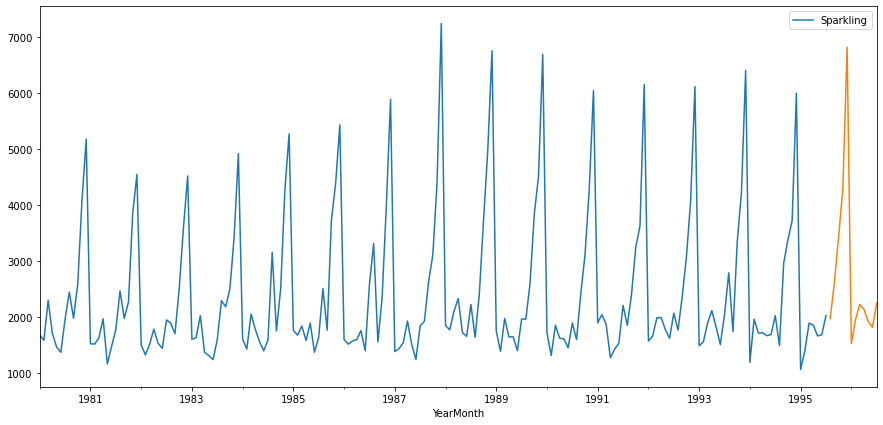

In [308]:
sparkle.plot()
prediction_1.plot();

In [309]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

lower_CI   prediction     upper_ci
1995-08-01  1210.026565  1977.230483  2744.434402
1995-09-01  1863.226093  2630.430011  3397.633930
1995-10-01  2676.175225  3443.379143  4210.583062
1995-11-01  3533.489521  4300.693440  5067.897358
1995-12-01  6051.103478  6818.307397  7585.511315

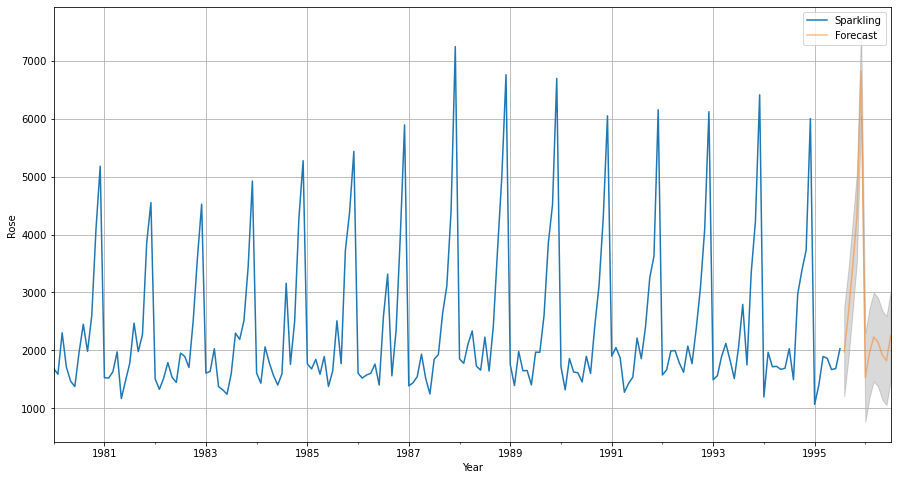

In [311]:
axis = sparkle.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.grid()
plt.show()

In [313]:
fullmodel1 = ExponentialSmoothing(rose,trend='multiplicative',
                                  seasonal='multiplicative').fit(smoothing_level=0.2,
                                                                 smoothing_trend=0.7,
                                                                 smoothing_seasonal=0.2)

C:\Users\Soundarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Soundarya\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Soundarya\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [315]:
RMSE_fullmodel1 = metrics.mean_squared_error(rose['Rose'],fullmodel1.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel1)

RMSE: 20.681380709733475


In [316]:
prediction_1 = fullmodel1.forecast(steps=12)

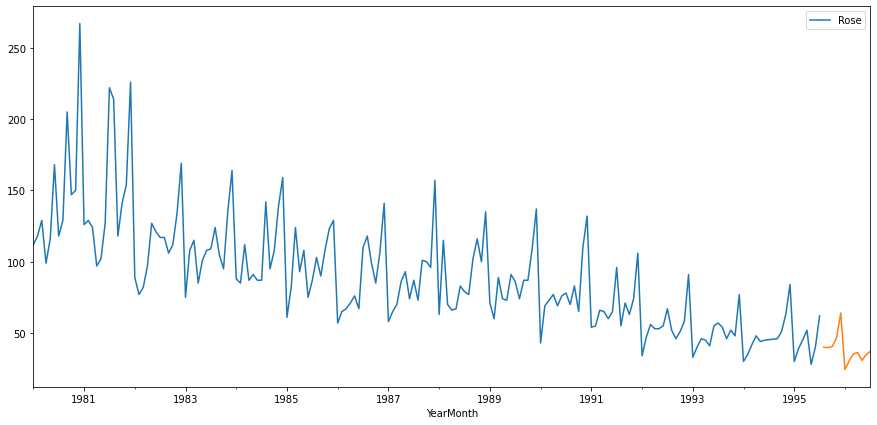

In [317]:
rose.plot()
prediction_1.plot();

In [318]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

lower_CI  prediction    upper_ci
1995-08-01  -0.538512   39.978825   80.496163
1995-09-01  -0.744895   39.772443   80.289780
1995-10-01   0.034644   40.551981   81.069318
1995-11-01   5.969813   46.487150   87.004487
1995-12-01  23.535288   64.052625  104.569962

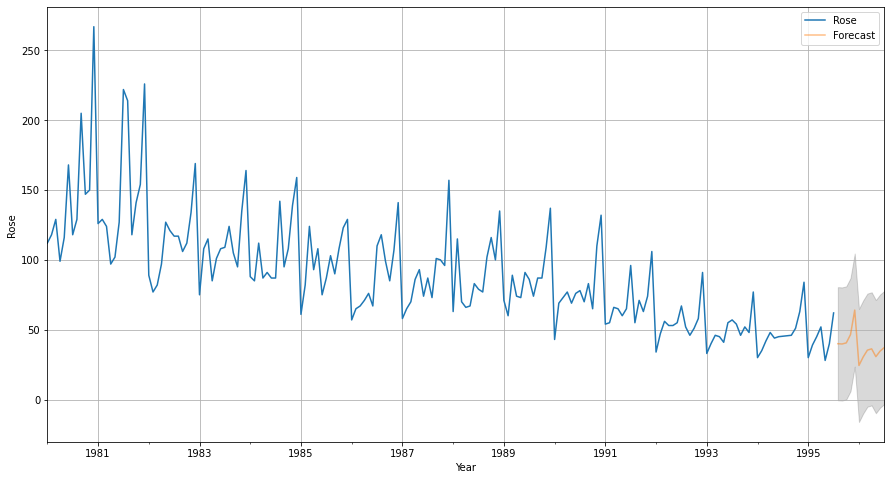

In [320]:
axis = rose.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.grid()
plt.show()